<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes
Lizeth Viviana Perdomo Castañeda  
  
**Dataset:** AirBnb Listings - Santiago, Región Metropolitana de Santiago, Chile [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Santiago de Chile. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. You're a consultant for individuals and firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: September, 2024

In [1]:
import pip

%pip install seaborn
%pip install mlxtend
%pip install networkx


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import networkx as nx

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D


In [3]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### 1. Load the data

In [4]:
# Loading the CSV file as dataframe
listings_Santiago_df = pd.read_csv("./listings.csv.gz")

In [5]:
# Showing dataframe dimensions
listings_Santiago_df.shape

(13053, 75)

In [6]:
listings_Santiago_df.sample(5) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3404,35124962,https://www.airbnb.com/rooms/35124962,20240629050059,2024-06-29,city scrape,Habitación Ejecutiv@ solo mes completo.,"Spacious house, with comfortable common areas,...",The house is in the civic neighborhood of macu...,https://a0.muscache.com/pictures/miso/Hosting-...,263462543,https://www.airbnb.com/users/show/263462543,Jimena,2019-05-22,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7a548...,https://a0.muscache.com/im/pictures/user/7a548...,NaN,2,3,['phone'],t,t,"Macul, Santiago Metropolitan Region, Chile",Macul,NaN,-33.485800,-70.599560,Private room in home,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Free parking on premises"", ""Extra pillows an...","$29,760.00",15,1125,15,15,1125,1125,15.0,1125.0,NaN,t,28,58,88,178,2024-06-29,2,0,0,2023-02-17,2023-05-02,5.0,5.0,5.0,5.0,5.0,5.0,5.0,76304818-7,f,2,0,2,0,0.12
11818,1130336904118246913,https://www.airbnb.com/rooms/1130336904118246913,20240629050059,2024-06-29,city scrape,Luminoso y moderno departamento,Welcome to this charming 1 bedroom department ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,275766213,https://www.airbnb.com/users/show/275766213,Leonel,2019-07-13,NaN,NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/7dde7...,https://a0.muscache.com/im/pictures/user/7dde7...,NaN,1,1,['phone'],t,t,NaN,Santiago,NaN,-33.449019,-70.637385,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Pool"", ""Hot water kettle"", ""Dining table"", ""...","$29,543.00",1,365,1,1,365,365,1.0,365.0,NaN,t,11,14,14,14,2024-06-29,5,5,2,2024-04-21,2024-06-23,5.0,5.0,5.0,4.8,5.0,5.0,5.0,NaN,t,1,1,0,0,2.14
11449,1111509702895526438,https://www.airbnb.com/rooms/1111509702895526438,20240629050059,2024-06-29,city scrape,"Amplio Apto Valle Nevado, 4 piezas, Terraza, 9...","Spacious apartment, 4 rooms, 3 bathrooms for 9...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24011672,https://www.airbnb.com/users/show/24011672,Maria,2014-11-21,"Santiago, Chile","Somos Andeski Chile, empresa dedicada a Alojam...",within a day,64%,45%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,27,30,"['email', 'phone', 'work_email']",t,t,NaN,Lo Barnechea,NaN,-33.358261,-70.249813,Entire rental unit,Entire home/apt,9,3.0,3 baths,4.0,8.0,"[""Central heating"", ""Dining table"", ""BBQ grill...","$550,000.00",1,365,1,2,365,365,1.2,365.0,NaN,t,7,27,57,237,2024-06-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,23,23,0,0,NaN
1047,14086082,https://www.airbnb.com/rooms/14086082,20240629050059,2024-06-29,city scrape,Pieza para compartir en Providencia,"A piece is rented in a single woman apartment,

### 2. Basic quality and cleanliness analysis

Quality dimensions:
1. Completeness: Null values ​
2. Uniqueness: Identify duplicate rows
3. Consistency: Review data types

In [7]:
#Completeness: Null values ​​per column
print("\nCompleteness analysis (null values ​​per column):")
null_values_by_column = listings_Santiago_df.isnull().sum()
null_percentage_by_column = (null_values_by_column / len(listings_Santiago_df)) * 100
completitud = pd.DataFrame({
    'Null Values': null_values_by_column,
    'Null Percentage': null_percentage_by_column
})
print(completitud.sort_values(by='Null Percentage', ascending=False))


Completeness analysis (null values ​​per column):
                                              Null Values  Null Percentage
neighbourhood_group_cleansed                        13053       100.000000
calendar_updated                                    13053       100.000000
license                                             12869        98.590362
host_neighbourhood                                  10760        82.433157
neighborhood_overview                                7430        56.921780
neighbourhood                                        7430        56.921780
host_about                                           7372        56.477438
host_location                                        4281        32.797058
review_scores_location                               3149        24.124722
review_scores_checkin                                3148        24.117061
review_scores_communication                          3148        24.117061
review_scores_value                              

In [8]:
#Completeness: Null values ​​per row
print("\nCompleteness analysis (null values ​​per row):")
null_values_by_row = listings_Santiago_df.isnull().sum(axis=1)
null_percentage_by_row = (null_values_by_row / listings_Santiago_df.shape[1]) * 100
completitud_row = pd.DataFrame({
    'Null Values': null_values_by_row,
    'Null Percentage': null_percentage_by_row
})
print("\nDistribution of rows according to percentage of null values:")
print(completitud_row['Null Percentage'].value_counts(bins=10, sort=False))


Completeness analysis (null values ​​per row):

Distribution of rows according to percentage of null values:
(2.6310000000000002, 6.133]    2320
(6.133, 9.6]                   5184
(9.6, 13.067]                  1621
(13.067, 16.533]                550
(16.533, 20.0]                  473
(20.0, 23.467]                  832
(23.467, 26.933]                981
(26.933, 30.4]                  389
(30.4, 33.867]                  548
(33.867, 37.333]                155
Name: count, dtype: int64


In [9]:
#Uniqueness: Identify duplicate rows
duplicates = listings_Santiago_df.duplicated()
print(f"\nNumber of duplicate records (rows): {duplicates.sum()}")


Number of duplicate records (rows): 0


In [10]:
if listings_Santiago_df['id'].is_unique:
    print("Column 'id' does not contain duplicates")
else:
    print("There are duplicates in the 'id' column")

Column 'id' does not contain duplicates


In [11]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings_Santiago_df["id"].nunique()

13053

In [12]:
#Consistency: Review data types
listings_Santiago_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13053 entries, 0 to 13052
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            13053 non-null  int64  
 1   listing_url                                   13053 non-null  object 
 2   scrape_id                                     13053 non-null  int64  
 3   last_scraped                                  13053 non-null  object 
 4   source                                        13053 non-null  object 
 5   name                                          13053 non-null  object 
 6   description                                   12488 non-null  object 
 7   neighborhood_overview                         5623 non-null   object 
 8   picture_url                                   13053 non-null  object 
 9   host_id                                       13053 non-null 

#### Basic data cleaning

In [13]:
#Remove columns with 95% or more null values
listings_Santiago_df = listings_Santiago_df.drop(columns=["neighbourhood_group_cleansed", "calendar_updated", "license"])

In [14]:
listings_Santiago_df.shape

(13053, 72)

In [15]:
# We need to transform the price attribute from object to float
listings_Santiago_df["price_float"] = listings_Santiago_df["price"].str.replace("[$,]", "", regex=True).astype(float)

print(listings_Santiago_df["price_float"].dtype)

float64


In [16]:
listings_Santiago_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float
0,49392,https://www.airbnb.com/rooms/49392,20240629050059,2024-06-29,city scrape,Share my Flat in Providencia,NaN,NaN,https://a0.muscache.com/pictures/3740612/b1850...,224592,https://www.airbnb.com/users/show/224592,Maria,2010-09-05,"Providencia, Chile","Disfruto viajando, sobre todo a lugares donde ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/bd1a8...,https://a0.muscache.com/im/pictures/user/bd1a8...,NaN,2,3,"['email', 'phone']",t,t,NaN,Providencia,-33.43277,-70.59892,Private room in rental unit,Private room,1,NaN,NaN,1.0,1.0,[],"$50,183.00",3,730,3,3,730,730,3.0,730.0,t,28,58,88,178,2024-06-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN,50183.0
1,52811,https://www.airbnb.com/rooms/52811,20240629050059,2024-06-29,city scrape,Suite Providencia 1 Santiago Chile,Apartment located on the subway station Manuel...,Building located at the entrance to the Manuel...,https://a0.muscache.com/pictures/miso/Hosting-...,244792,https://www.airbnb.com/users/show/244792,Cristián,2010-09-25,"Santiago Metropolitan Region, Chile","Un tipo profesional, trabajador, sencillo, con...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/244792/profil...,https://a0.muscache.com/im/users/244792/profil...,NaN,3,4,"['email', 'phone', 'work_email']",t,t,"Providencia, Región Metropolitana, Chile",Providencia,-33.42959,-70.61880,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,1.0,"[""Pool"", ""BBQ grill"", ""Air conditioning"", ""Wif...","$51,130.00",1,1825,1,1,1125,1125,1.0,1125.0,t,0,0,0,271,2024-06-29,45,0,0,2010-11-13,2021-11-04,4.42,4.59,4.52,4.66,4.59,4.64,4.36,t,3,3,0,0,0.27,51130.0
2,53494,https://www.airbnb.com/rooms/53494,20240629050059,2024-06-29,city scrape,depto centro ski el colorado chile,NaN,NaN,https://a0.muscache.com/pictures/310936/ff7d53...,249097,https://www.airbnb.com/users/show/249097,Paulina,2010-09-29,NaN,"Soy dentista, casada,4 hijos",within an hour,100%,74%,f,https://a0.muscache.com/im/pictures/user/6d0ff...,https://a0.muscache.com/im/pictures/user/6d0ff...,NaN,2,2,"['email', 'phone']",t,t,NaN,Lo Barnechea,-33.34521,-70.29543,Entire rental unit,Entire home/apt,6,2.0,2 baths,2.0,8.0,"[""Free parking on premises"", ""Essentials"", ""Se...","$235,714.00",2,730,1,2,730,730,2.0,730.0,t,4,17,44,319,2024-06-29,41,4,4,2016-07-04,2024-06-20,4.76,4.80,4.90,4.88,4.90,4.76,4.68,f,1,1,0,0,0.42,235714.0
3,65058,https://www.airbnb.com/rooms/65058,20240629050059,2024-06-29,previous scrape,Dpto amoblado centro historico,NaN,NaN,https://a0.muscache.com/pictures/1023289/2ec04...,318016,https://www.airbnb.com/users/show/318016,Patricio,2010-12-13,"Santiago, Chile",Me gusta el deporte y la vida al aire libre (b...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/318016/

### 3. Univariate Analysis

The five most relevant attributes for real estate investment analysis are: 

1. Price
2. Location
3. Property Type
4. User Rating
5. Amenities
6. Others

#### 3.1 Price

In [17]:
mean_price = listings_Santiago_df['price_float'].mean(skipna=True)
print(mean_price)

87723.22100597068


In [18]:
variance_price = listings_Santiago_df['price_float'].var(skipna=True)
print(variance_price)

656895335075.6017


In [19]:
std_dev_price = listings_Santiago_df['price_float'].std(skipna=True)
print(std_dev_price)

810490.798883986


In [20]:
listings_Santiago_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    1.105400e+04
mean     8.772322e+04
std      8.104908e+05
min      7.077000e+03
5%       1.751690e+04
25%      3.000000e+04
50%      4.311100e+04
75%      6.500000e+04
95%      2.358479e+05
max      6.230280e+07
Name: price_float, dtype: float64

In [21]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_Santiago_df["price_float"].quantile(0.25)
q3 = listings_Santiago_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

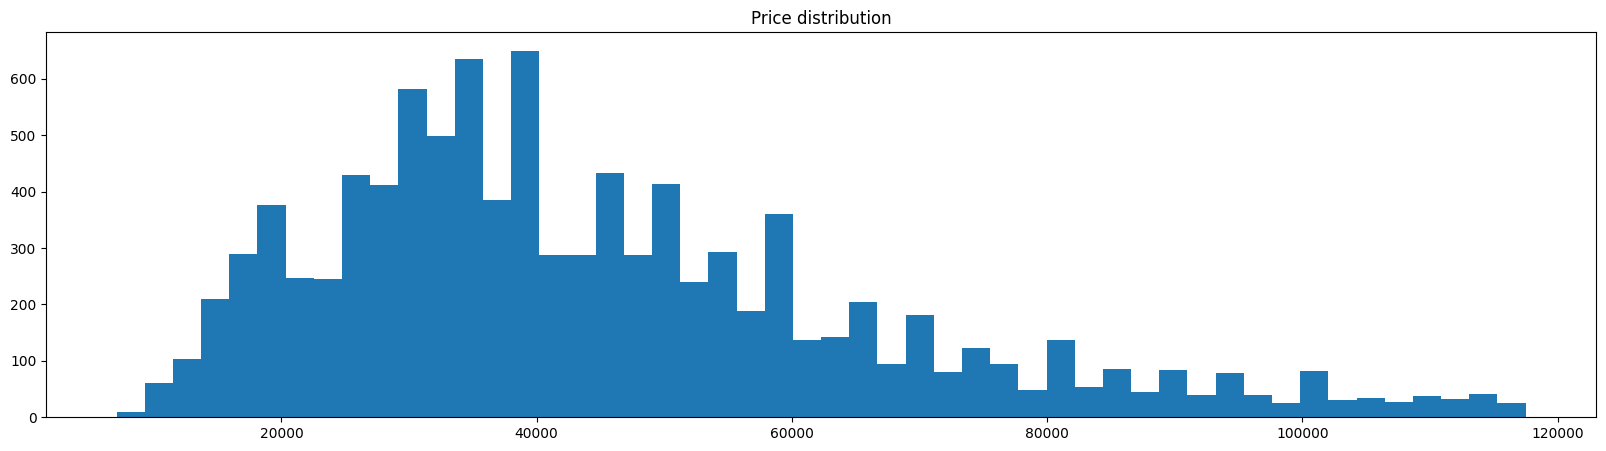

In [22]:
plt.figure(figsize=(20, 5))
plt.hist(listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

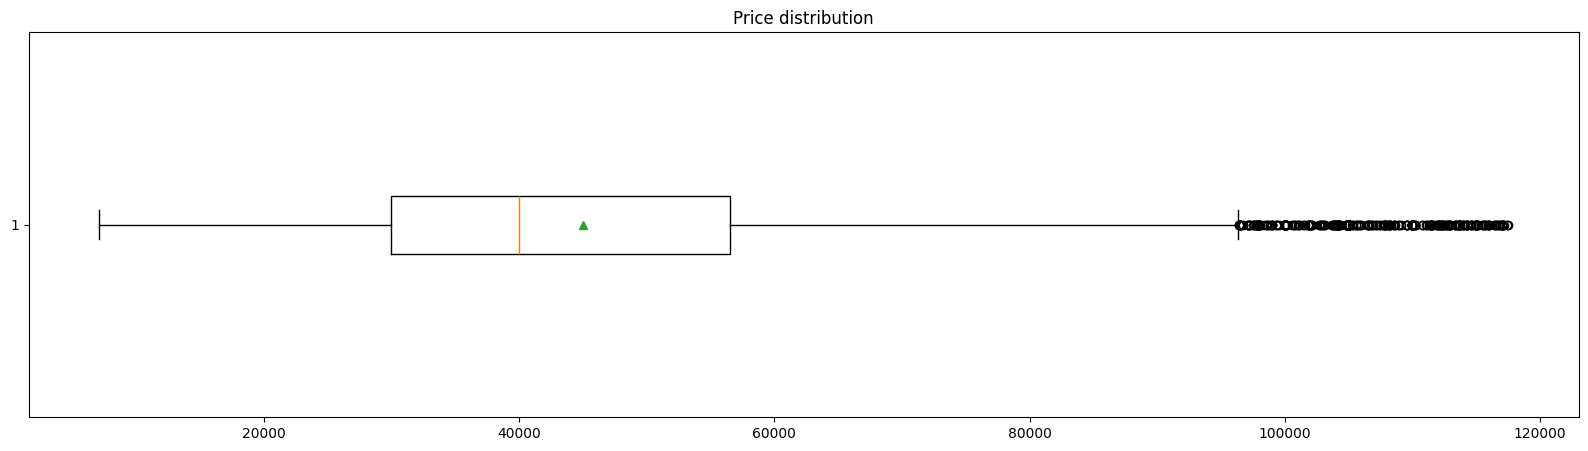

In [23]:
plt.figure(figsize=(20, 5))
plt.boxplot(listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], showmeans=True, vert=False)
plt.title("Price distribution")
plt.show()

#### 3.2 Location

In [24]:
# Showing unique values of neighborhoods
listings_Santiago_df["neighbourhood_cleansed"].unique()

array(['Providencia', 'Lo Barnechea', 'Recoleta', 'Santiago',
       'La Florida', 'Las Condes', 'La Reina', 'Ñuñoa', 'Independencia',
       'San Miguel', 'Vitacura', 'Maipú', 'Peñalolén', 'Estación Central',
       'Pedro Aguirre Cerda', 'San Joaquín', 'Macul', 'El Bosque',
       'Lo Espejo', 'La Cisterna', 'Quinta Normal', 'Quilicura',
       'Pudahuel', 'Lo Prado', 'Huechuraba', 'Renca', 'Cerrillos',
       'La Granja', 'Conchalí', 'Cerro Navia', 'San Ramón'], dtype=object)

In [25]:
#Relative frequency
listings_Santiago_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=True)

neighbourhood_cleansed
Santiago               0.343446
Providencia            0.190684
Las Condes             0.168850
Ñuñoa                  0.076228
Lo Barnechea           0.056615
Vitacura               0.024669
Recoleta               0.020302
Estación Central       0.018463
La Florida             0.012334
San Miguel             0.011798
Macul                  0.010879
La Reina               0.009959
Maipú                  0.007814
Peñalolén              0.006818
Independencia          0.006589
San Joaquín            0.006435
Pudahuel               0.005516
La Cisterna            0.005516
Huechuraba             0.004214
Quinta Normal          0.003294
Quilicura              0.002911
Renca                  0.001685
El Bosque              0.000996
Cerrillos              0.000919
Lo Prado               0.000766
Conchalí               0.000689
La Granja              0.000689
Pedro Aguirre Cerda    0.000383
Cerro Navia            0.000383
Lo Espejo              0.000077
San Ramón        

In [26]:
#Absolute frequency
listings_Santiago_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=False)

neighbourhood_cleansed
Santiago               4483
Providencia            2489
Las Condes             2204
Ñuñoa                   995
Lo Barnechea            739
Vitacura                322
Recoleta                265
Estación Central        241
La Florida              161
San Miguel              154
Macul                   142
La Reina                130
Maipú                   102
Peñalolén                89
Independencia            86
San Joaquín              84
Pudahuel                 72
La Cisterna              72
Huechuraba               55
Quinta Normal            43
Quilicura                38
Renca                    22
El Bosque                13
Cerrillos                12
Lo Prado                 10
Conchalí                  9
La Granja                 9
Pedro Aguirre Cerda       5
Cerro Navia               5
Lo Espejo                 1
San Ramón                 1
Name: count, dtype: int64

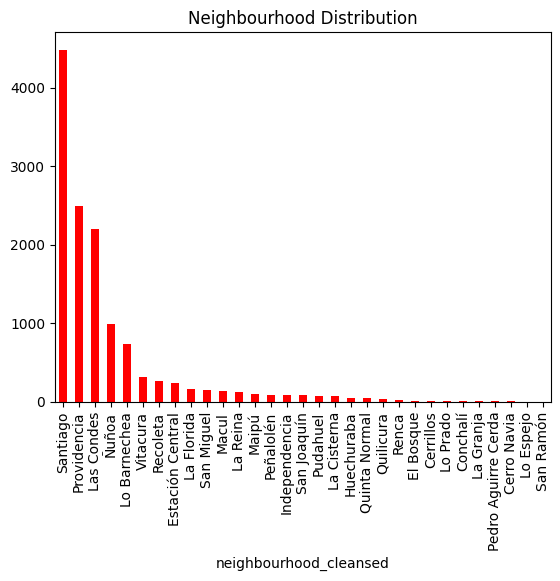

In [27]:
listings_Santiago_df["neighbourhood_cleansed"].value_counts().plot(kind="bar", color="red")
plt.title("Neighbourhood Distribution")

plt.show()

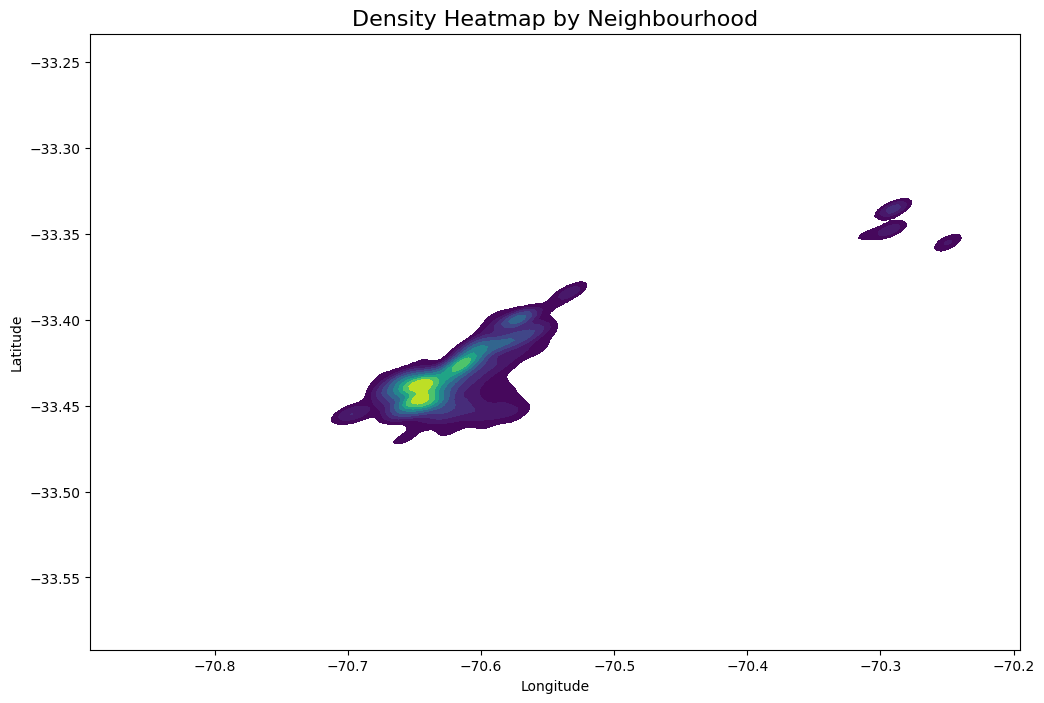

In [28]:
df_geo = listings_Santiago_df[['neighbourhood_cleansed', 'latitude', 'longitude']].dropna()

plt.figure(figsize=(12, 8))
sns.kdeplot(
    data = df_geo,
    x="longitude", 
    y="latitude", 
    cmap="viridis", # Color del mapa de densidad
    fill=True,
    bw_adjust=.5,
    thresh=0.2
)

plt.title('Density Heatmap by Neighbourhood', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

#### 3.3 Property Type

In [29]:
# Calculating the relative frecuency of room types
listings_Santiago_df["room_type"].value_counts(dropna=False, normalize=True)

room_type
Entire home/apt    0.705585
Private room       0.279093
Shared room        0.012794
Hotel room         0.002528
Name: proportion, dtype: float64

In [30]:
#Absolute frequency
listings_Santiago_df["room_type"].value_counts(dropna=False, normalize=False)

room_type
Entire home/apt    9210
Private room       3643
Shared room         167
Hotel room           33
Name: count, dtype: int64

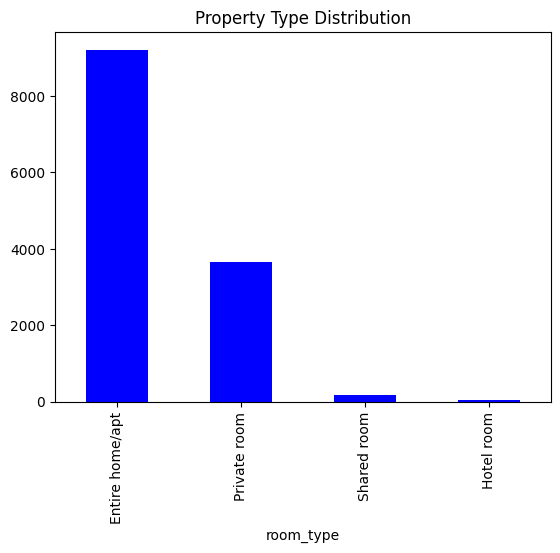

In [31]:
listings_Santiago_df["room_type"].value_counts().plot(kind="bar", color="blue")
plt.title("Property Type Distribution")

plt.show()

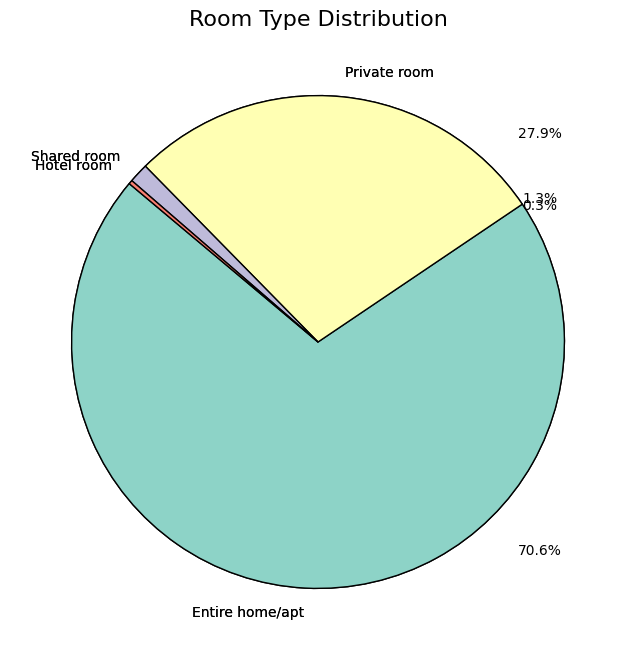

In [32]:
room_type_counts = listings_Santiago_df['room_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    room_type_counts, 
    labels=room_type_counts.index, 
    startangle=140, # Rotar el gráfico para una mejor visualización
    colors=sns.color_palette('Set3'), 
    wedgeprops={'edgecolor': 'black'}, 
    
)

wedges, texts, autotexts = plt.pie(
    room_type_counts, 
    labels=room_type_counts.index, 
    autopct='%1.1f%%', # Mostrar el porcentaje
    startangle=140, 
    colors=sns.color_palette('Set3'), 
    wedgeprops={'edgecolor': 'black'}, 
    pctdistance=0.85 # Ajustar la distancia del porcentaje al centro
)
for autotext in autotexts:
    autotext.set_position((0.9, autotext.get_position()[1]))  # Desplazar hacia fuera
    autotext.set_color('black')

plt.title('Room Type Distribution', fontsize=16)
plt.show()

#### 3.4 User Rating

In [33]:
mean_rating = listings_Santiago_df['review_scores_rating'].mean(skipna=True)
print(mean_rating)

4.747700070642851


In [34]:
variance_rating = listings_Santiago_df['review_scores_rating'].var(skipna=True)
print(variance_rating)

0.16065727539462565


In [35]:
std_dev_rating = listings_Santiago_df['review_scores_rating'].std(skipna=True)
print(std_dev_rating)

0.4008207522005637


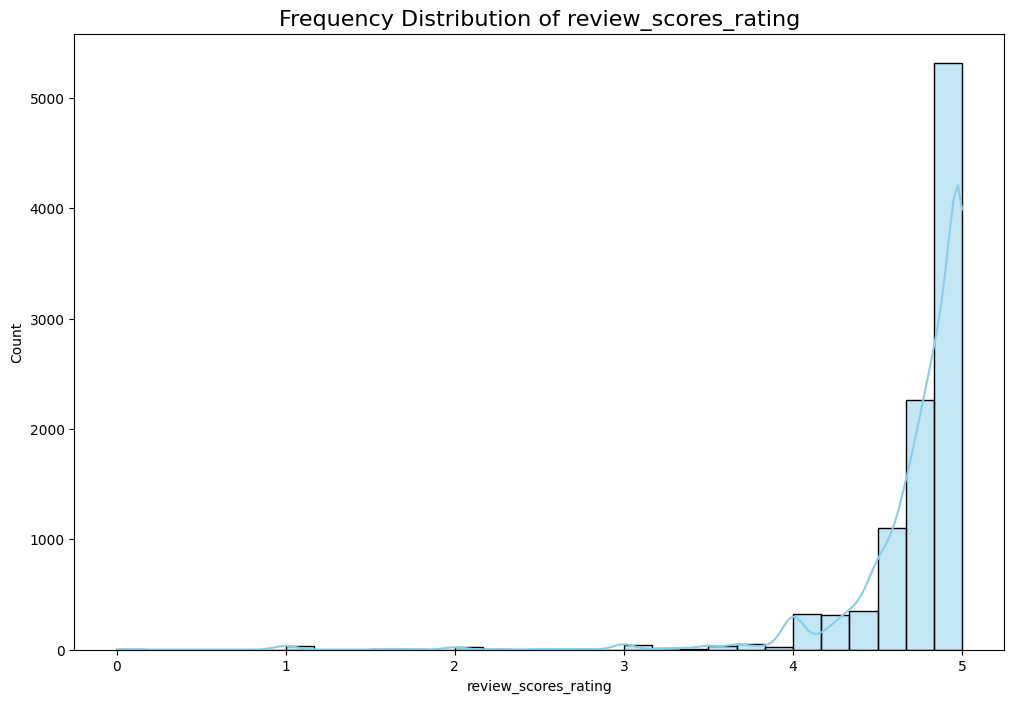

In [36]:
plt.figure(figsize=(12, 8))

sns.histplot(
    listings_Santiago_df['review_scores_rating'].dropna(), 
    bins=30, 
    kde=True,  # Añadir una estimación de densidad (kde)
    color='skyblue'
)

plt.title('Frequency Distribution of review_scores_rating', fontsize=16)

plt.show()

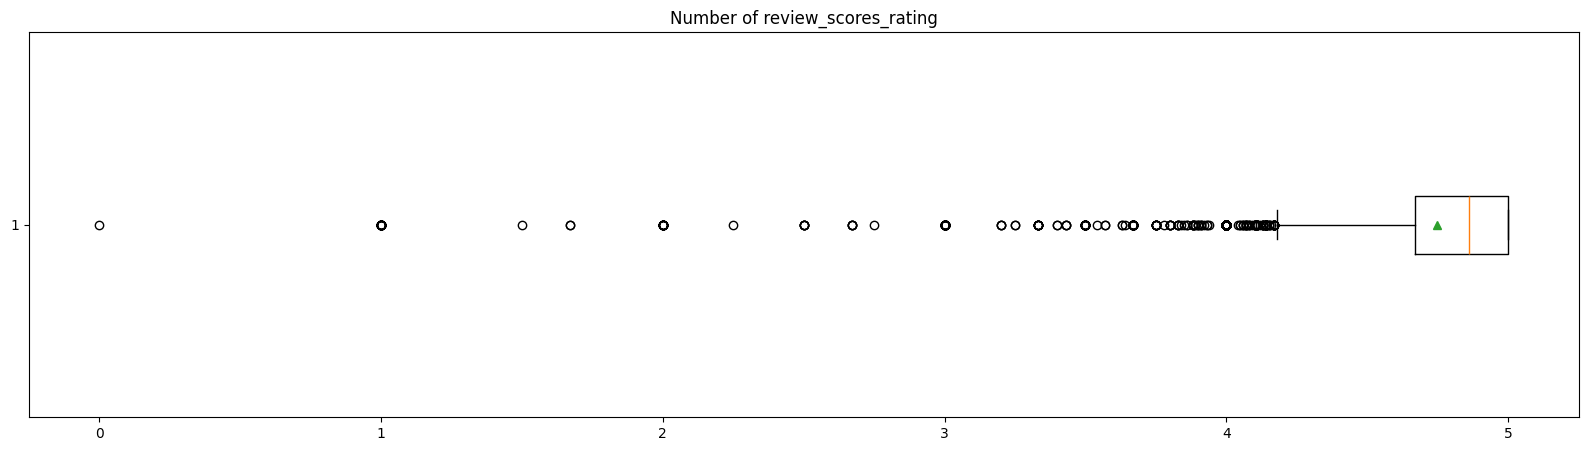

In [37]:

# Plotting a boxplot for review_scores_rating
plt.figure(figsize=(20, 5))
plt.boxplot(listings_Santiago_df.loc[listings_Santiago_df["review_scores_rating"] <= (q3 + 1.5 * iqr)]["review_scores_rating"], showmeans=True, vert=False)
plt.title("Number of review_scores_rating")
plt.show()

In [38]:
mean_number_reviews = listings_Santiago_df['number_of_reviews'].mean(skipna=True)
print(mean_number_reviews)

27.994713858883017


In [39]:
variance_number_reviews = listings_Santiago_df['number_of_reviews'].var(skipna=True)
print(variance_number_reviews)

3127.9907014447035


In [40]:
std_dev_number_review = listings_Santiago_df['number_of_reviews'].std(skipna=True)
print(std_dev_number_review)

55.92844268746184


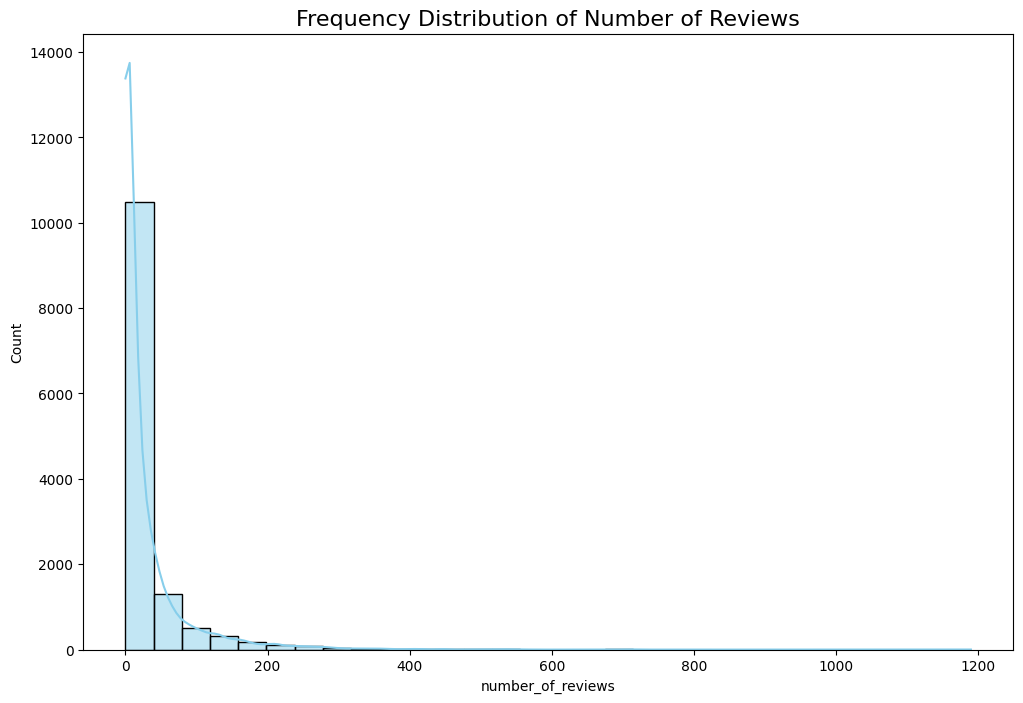

In [41]:
plt.figure(figsize=(12, 8))

sns.histplot(
    listings_Santiago_df['number_of_reviews'].dropna(), 
    bins=30, 
    kde=True,  # Añadir una estimación de densidad (kde)
    color='skyblue'
)

plt.title('Frequency Distribution of Number of Reviews', fontsize=16)

plt.show()

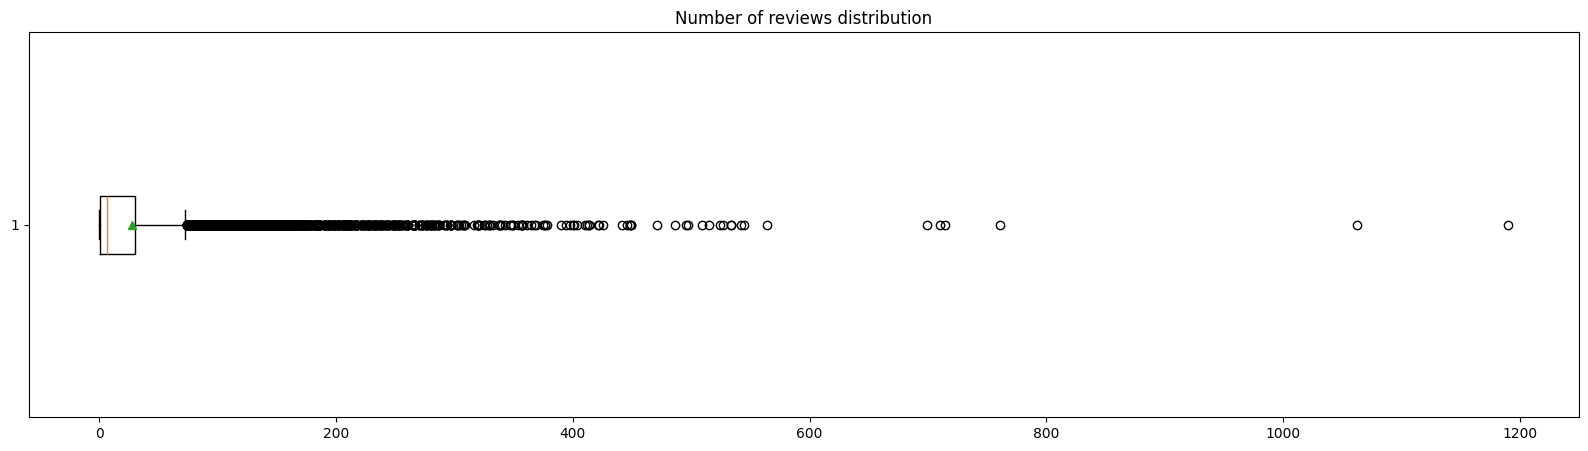

In [42]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_Santiago_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

In [43]:
#Frequency distribution number_of_reviews
df_number_reviews = listings_Santiago_df['number_of_reviews'].dropna()
frequency_distribution_number_reviews = df_number_reviews.value_counts().sort_index()
print(frequency_distribution_number_reviews)

number_of_reviews
0       3144
1        968
2        650
3        504
4        416
        ... 
710        1
714        1
761        1
1062       1
1190       1
Name: count, Length: 349, dtype: int64


#### 3.5 Amenities

In [44]:
listings_Santiago_df["amenities"].unique()

array(['[]',
       '["Pool", "BBQ grill", "Air conditioning", "Wifi", "Shampoo", "Fire extinguisher", "Carbon monoxide alarm", "Microwave", "Paid parking on premises", "Dishes and silverware", "Hair dryer", "TV with standard cable", "Washer", "Host greets you", "Oven", "Heating", "Hangers", "Long term stays allowed", "Elevator", "Paid parking off premises", "First aid kit", "Cooking basics", "Smoke alarm", "Refrigerator", "Essentials", "Gym", "Dryer", "Iron", "Hot water", "Kitchen"]',
       '["Free parking on premises", "Essentials", "Self check-in", "Building staff", "Heating", "TV with standard cable", "Hot water", "Kitchen"]',
       ...,
       '["Pets allowed", "TV", "Paid parking on premises", "Wifi", "Host greets you", "Kitchen", "Exterior security cameras on property"]',
       '["Dining table", "Freezer", "Clothing storage", "Laundromat nearby", "Free parking on premises", "Room-darkening shades", "Bed linens", "Outdoor furniture", "Wifi", "Shampoo", "Body soap", "Fire extin

In [45]:
#'Amenities' contains the services as a text string separated by commas, let's convert those text strings into lists
listings_Santiago_df['amenities'] = listings_Santiago_df['amenities'].apply(lambda x: x.split(','))

In [46]:
#Generate a set of all unique 'amenities' values
unique_amenities = set()
listings_Santiago_df['amenities'].apply(lambda x: unique_amenities.update(x))

0        None
1        None
2        None
3        None
4        None
         ... 
13048    None
13049    None
13050    None
13051    None
13052    None
Name: amenities, Length: 13053, dtype: object

In [47]:
#Convert the set into a list for better handling
unique_amenities = list(unique_amenities)

In [48]:
#Show the list of unique amenities
print("Listado de amenities únicos:")
for amenity in unique_amenities:
    print(amenity.strip()) #strip() method removes unnecessary whitespace

Listado de amenities únicos:
["Dryer \u2013 In building"
"TV with Apple TV"
"23 inch TV with HBO Max
"Fast wifi \u2013 193 Mbps"
"Sonos wifi / Harmon Kardoon Onyx 4 Bluetooth sound system"]
"Hangers"
"Double oven"
["Madesa refrigerator"
"Thor electric stove"
"Jab\u00f3n para manos body soap"
["Gym"
"FDV empotrado refrigerator"
"50 inch HDTV with Netflix"
"32 inch HDTV with HBO Max"
"Dedicated workspace"
["45 inch HDTV with Netflix"
"Fast wifi \u2013 283 Mbps"
"Teka double oven"
"50 inch HDTV with HBO Max
"IDEA refrigerator"
"120 inch HDTV with Netflix
"Varietal shampoo"
Friday - available at extra cost"
"Trotter stainless steel stove"
["Heating - split type ductless system"
["Hl conditioner"
"Baby safety gates"
Dove body soap"
"Equipo de m\u00fasica con bluetooth sound system with Bluetooth and aux"
Amazon Prime Video"
"TV with Netflix
"Garden view"]
"130 inch HDTV with Amazon Prime Video
"Free parking on premises \u2013 1 space"
"JABON LIQUIDO DE TOCADOR body soap"]
"Shared indoor poo

In [49]:
#Frequency top 10 amenities
all_amenities = [amenity.strip() for sublist in listings_Santiago_df['amenities'] for amenity in sublist]

from collections import Counter
amenity_counts = Counter(all_amenities)

top_10_amenities = amenity_counts.most_common(10)

top_10_df = pd.DataFrame(top_10_amenities, columns=['Amenity', 'Frequency'])

print(top_10_df)


                   Amenity  Frequency
0                   "Wifi"       9405
1              "Hot water"       8781
2             "Essentials"       8674
3                "Hangers"       8369
4             "Hair dryer"       8355
5  "Dishes and silverware"       8260
6         "Cooking basics"       7530
7             "Bed linens"       7340
8                "Kitchen"       7170
9           "Refrigerator"       7127


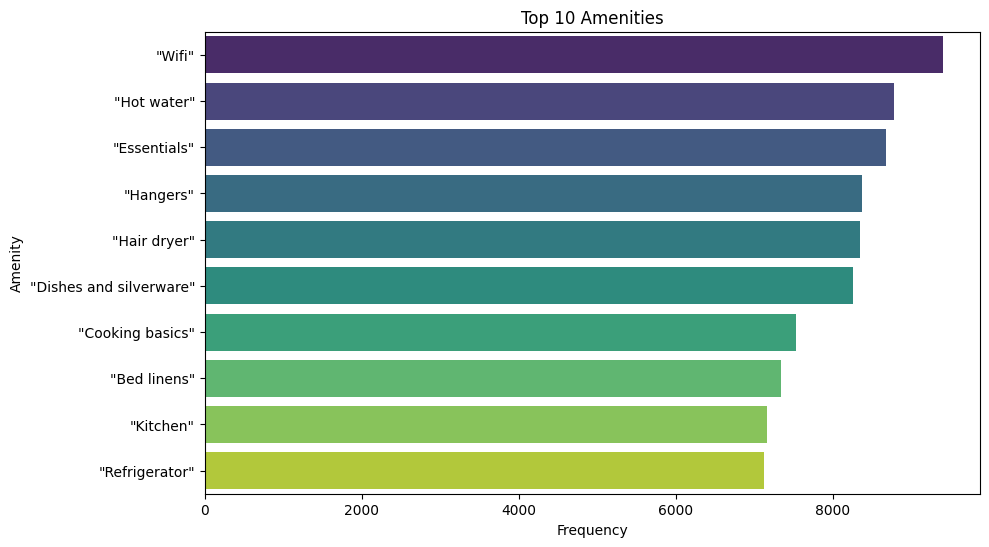

In [50]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", n_colors=10)
sns.barplot(x='Frequency', y='Amenity', data=top_10_df, hue='Amenity', dodge=False, palette= colors, legend=False)
plt.title('Top 10 Amenities')

plt.show()

In [51]:
moda_amenity = amenity_counts.most_common(1)
print("The most common amenity is:", moda_amenity[0][0])
print("With a frequency of:", moda_amenity[0][1])

The most common amenity is: "Wifi"
With a frequency of: 9405


#### 3.6 Others 

In [52]:
# Calculating basic statistics of accommodates
listings_Santiago_df["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    13053.000000
mean         2.930284
std          1.843821
min          1.000000
5%           1.000000
25%          2.000000
50%          2.000000
75%          4.000000
95%          6.000000
max         16.000000
Name: accommodates, dtype: float64

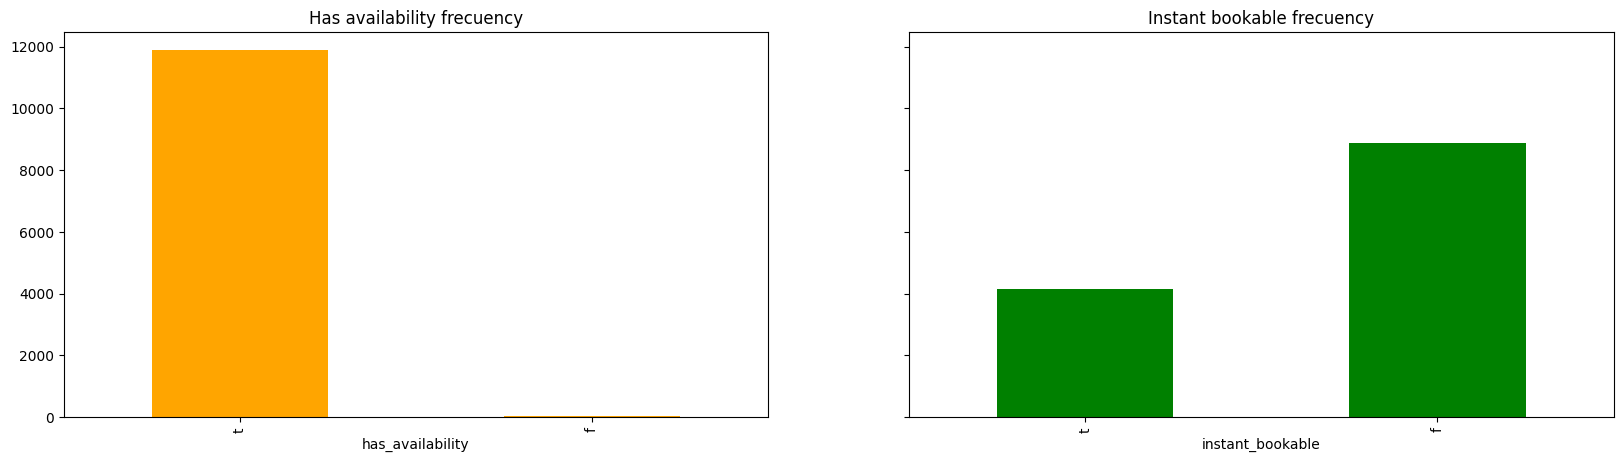

In [53]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_Santiago_df["has_availability"].value_counts().plot(kind="bar", ax=ax1, color="orange")
listings_Santiago_df["instant_bookable"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Has availability frecuency")
ax2.set_title("Instant bookable frecuency")
plt.show()

### 4. Multivariate Analysis

In [54]:
# For large datasets, some visualizations are innefective when trying to represent individual instances
# A naive strategy is to use only a random sample to visualize
listings_sample_df =  listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

(993, 73)

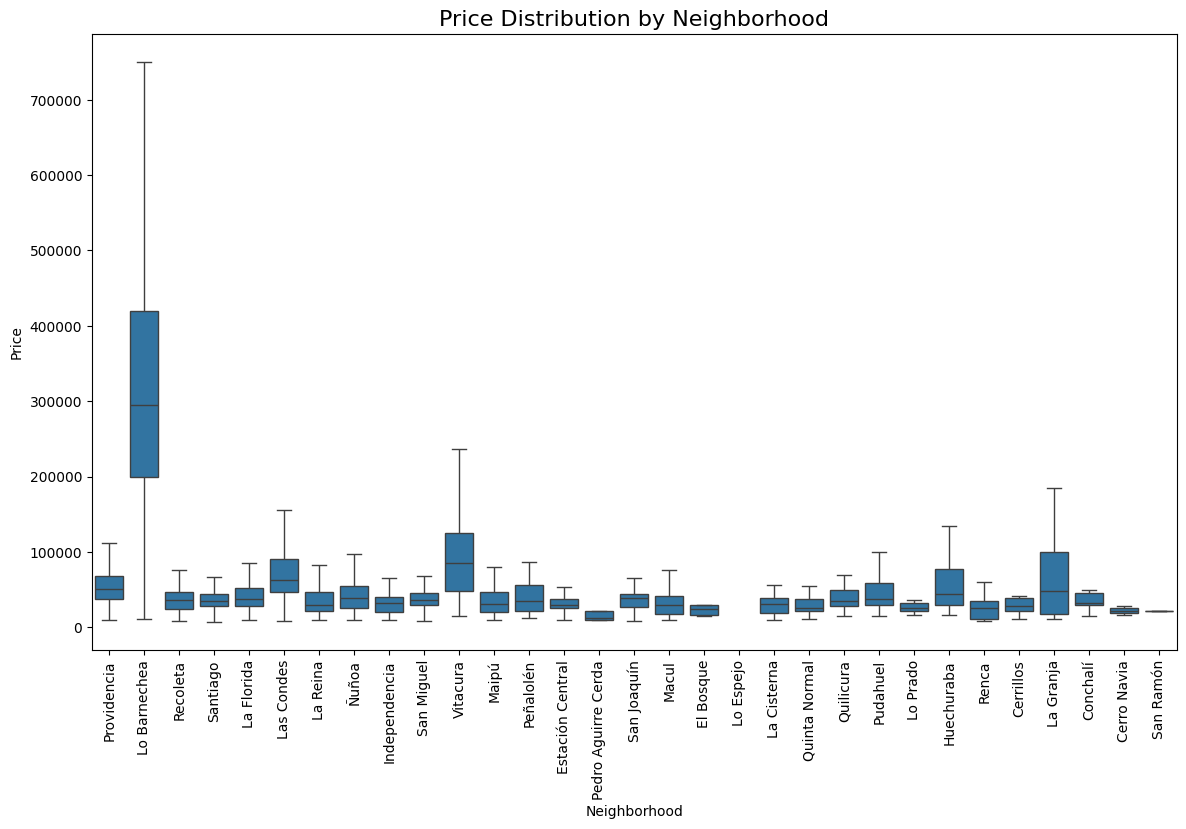

In [55]:
#boxplot - price distribution by neighborhood
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='neighbourhood_cleansed', 
    y='price_float', 
    data=listings_Santiago_df,
    showfliers=False, # Ocultar outliers para una visualización más clara
)

plt.xticks(rotation=90)
plt.title('Price Distribution by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()


C:\Users\lperd\AppData\Local\Temp\ipykernel_28292\1765512095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


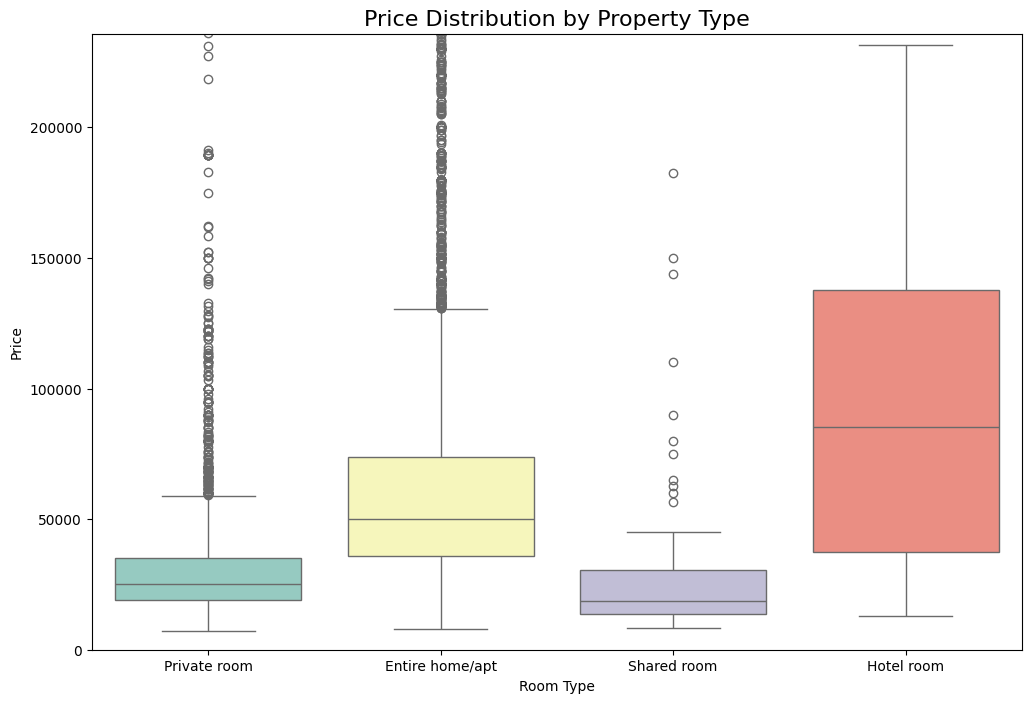

In [56]:
#boxplot - price distribution by property type
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='room_type', 
    y='price_float', 
    data=listings_Santiago_df,
    palette='Set3'
)

plt.title('Price Distribution by Property Type', fontsize=16)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.ylim(0, listings_Santiago_df['price_float'].quantile(0.95))  # Limitar el eje y para reducir el efecto de los outliers
plt.show()

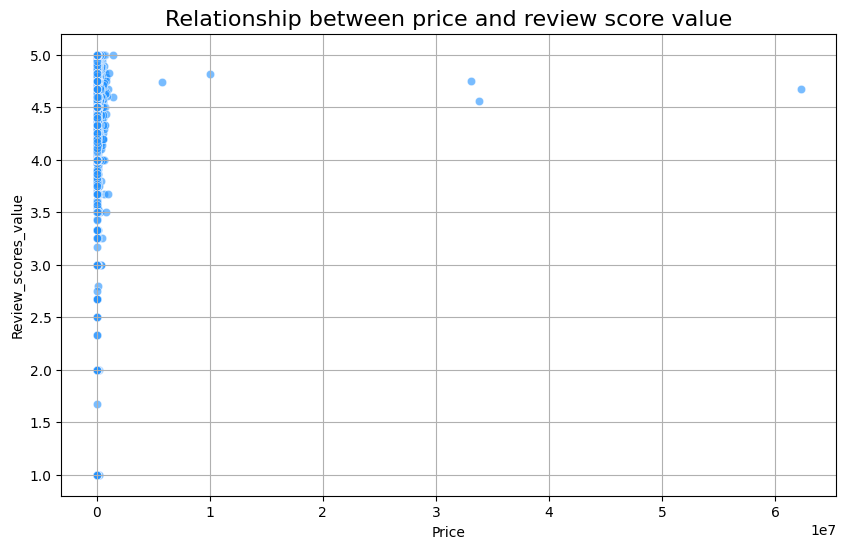

In [57]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='price_float', 
    y='review_scores_value', 
    data=listings_Santiago_df, 
    alpha=0.6, 
    color='dodgerblue'
)

plt.title('Relationship between price and review score value', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Review_scores_value')
plt.grid()
plt.show()

C:\Users\lperd\AppData\Local\Temp\ipykernel_28292\1256861043.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\lperd\AppData\Local\Temp\ipykernel_28292\1256861043.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


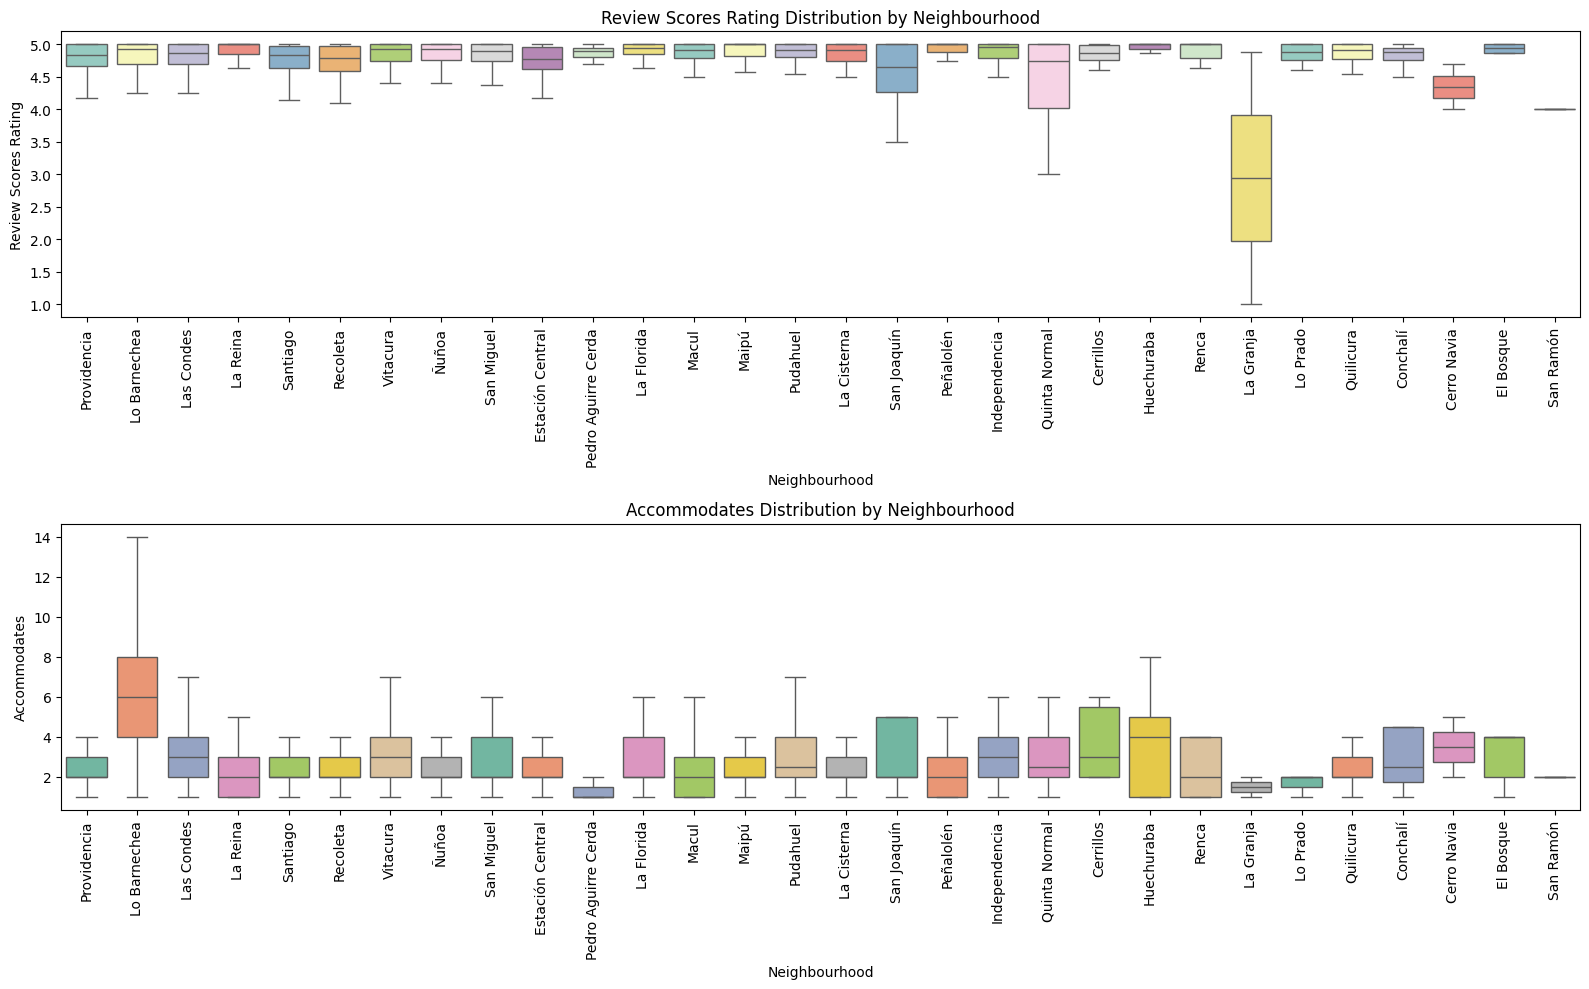

In [58]:
# Plotting the relationship between review_scores_rating and accommodates to different neighborhoods
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1) # Primer subplot
sns.boxplot(
    x='neighbourhood_cleansed', 
    y='review_scores_rating', 
    data=listings_Santiago_df[['neighbourhood_cleansed', 'review_scores_rating', 'accommodates']].dropna(),
    showfliers=False,
    palette="Set3"
)
plt.xticks(rotation=90)
plt.title('Review Scores Rating Distribution by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Review Scores Rating')

plt.subplot(2, 1, 2) # Segundo subplot
sns.boxplot(
    x='neighbourhood_cleansed', 
    y='accommodates', 
    data=listings_Santiago_df[['neighbourhood_cleansed', 'review_scores_rating', 'accommodates']].dropna(),
    showfliers=False,
    palette="Set2"
)
plt.xticks(rotation=90)
plt.title('Accommodates Distribution by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Accommodates')

plt.tight_layout()
plt.show()


C:\Users\lperd\AppData\Local\Temp\ipykernel_28292\967198264.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


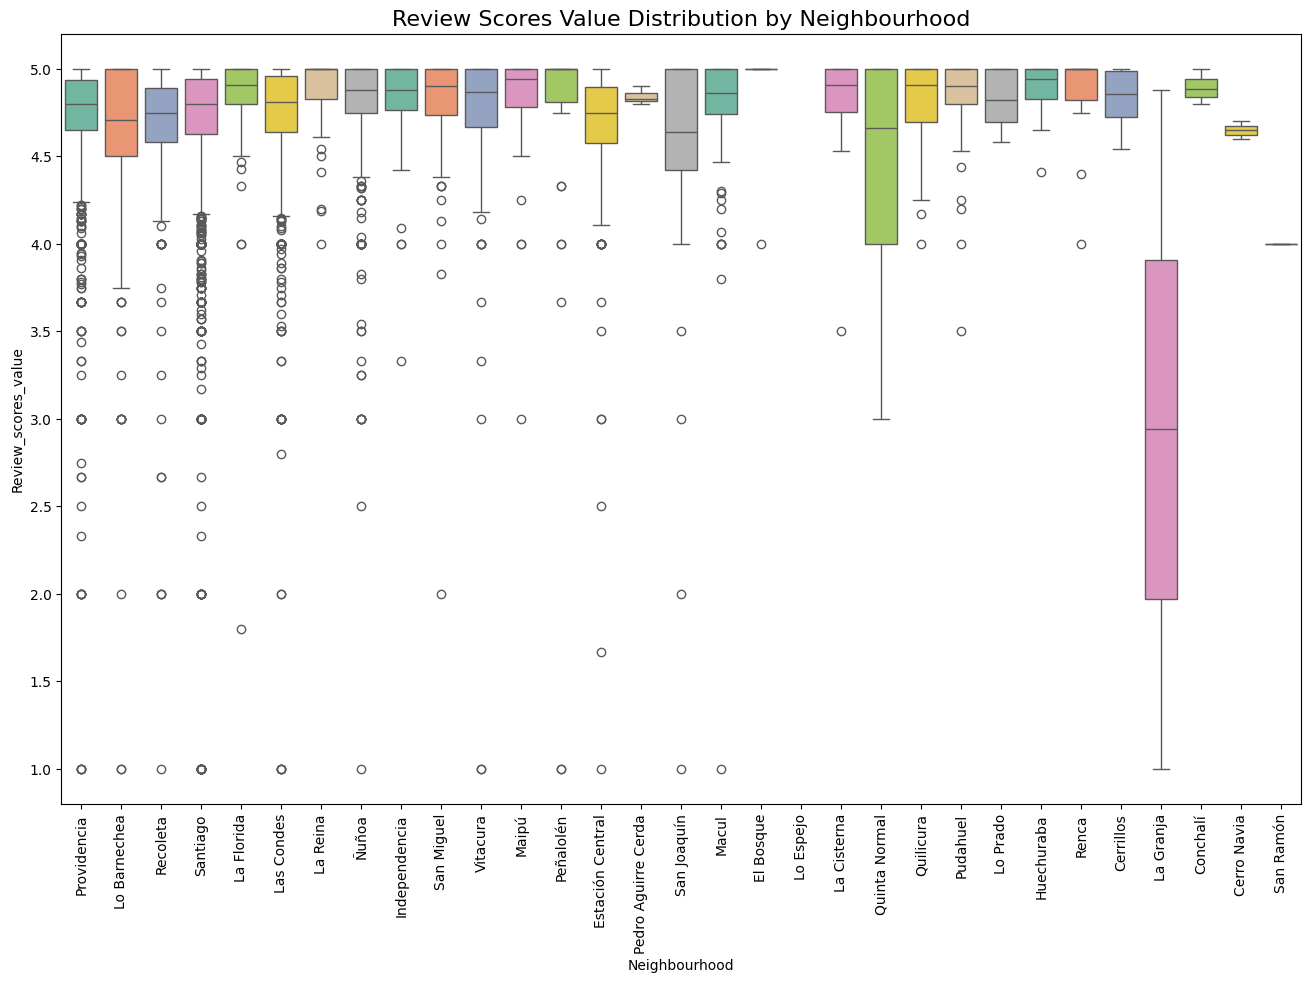

In [59]:
#boxplot para comparar review_scores_value con neighbourhood_cleansed
plt.figure(figsize=(16, 10))

sns.boxplot(
    x='neighbourhood_cleansed', 
    y='review_scores_value', 
    data=listings_Santiago_df,
    palette='Set2'
)

plt.xticks(rotation=90)
plt.title('Review Scores Value Distribution by Neighbourhood', fontsize=16)
plt.xlabel('Neighbourhood')
plt.ylabel('Review_scores_value')
plt.show()

In [60]:
# Another common strategy for working with datasets with high variability is by filtering the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_Santiago_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

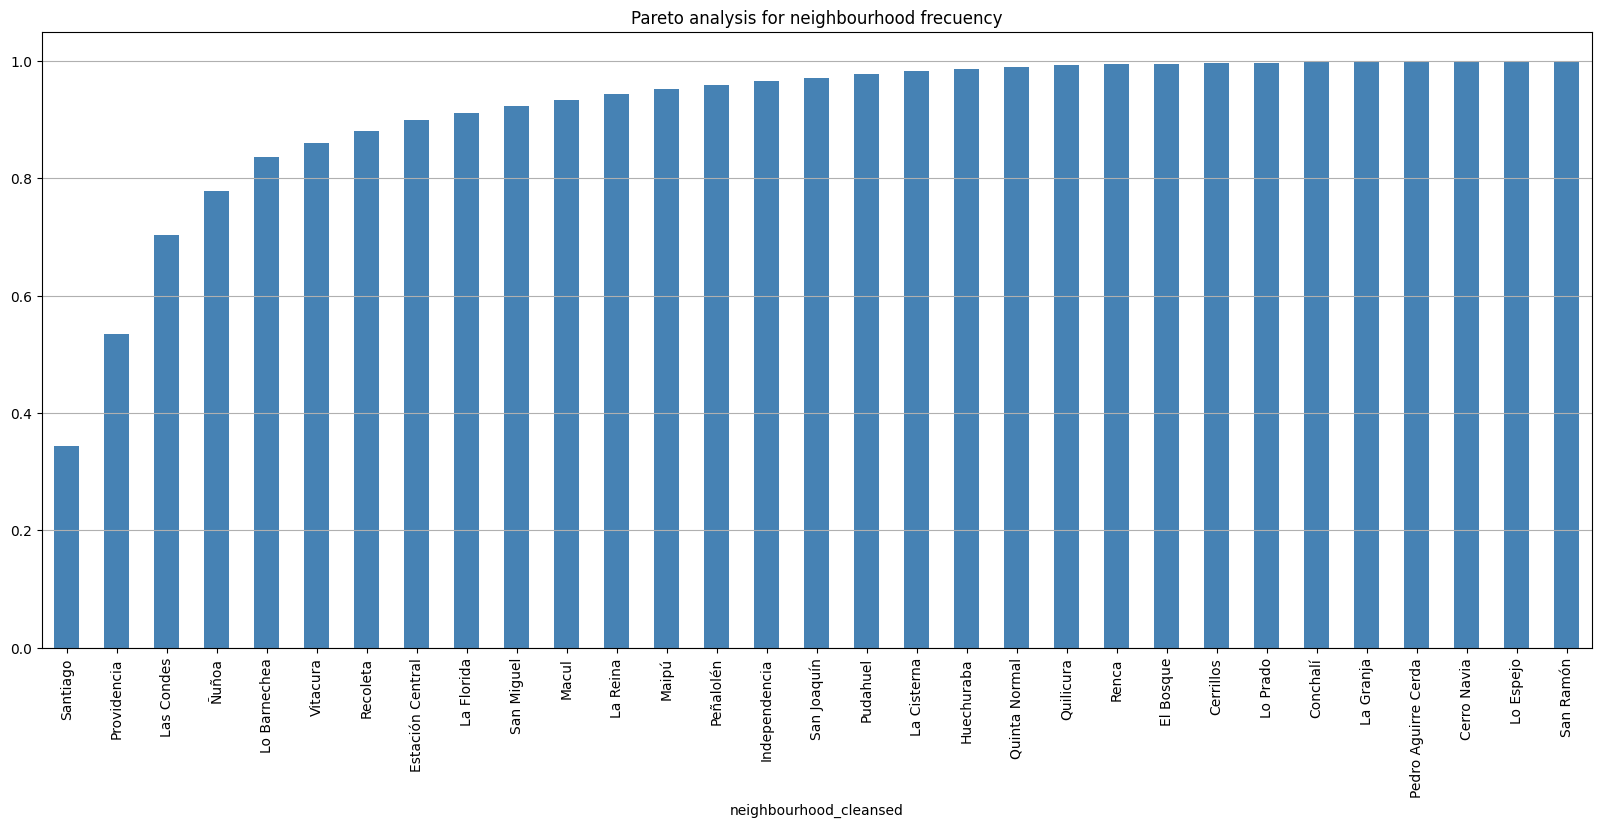

In [61]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [62]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

['Santiago', 'Providencia', 'Las Condes', 'Ñuñoa']

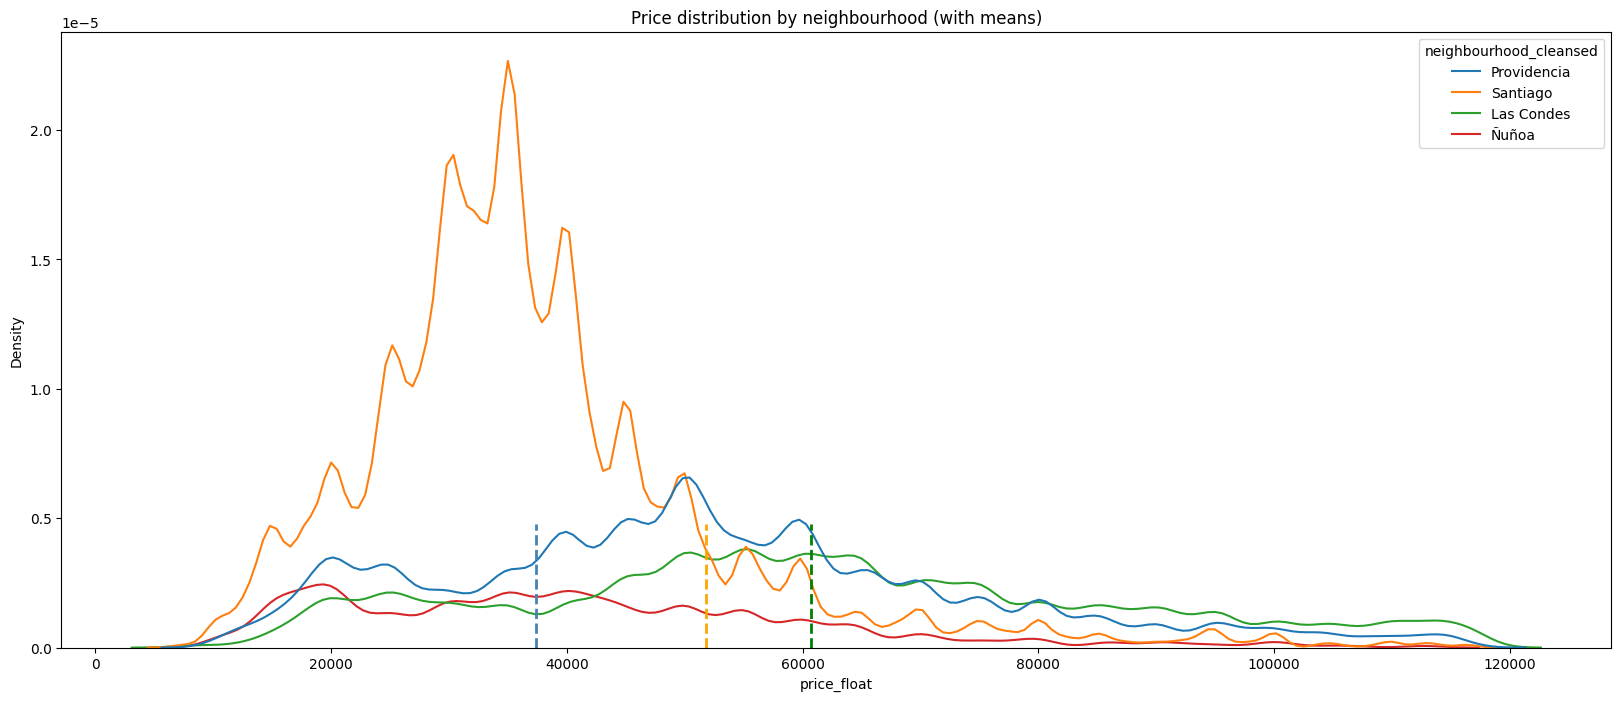

In [63]:
# Plotting price distribution by neighborhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_Santiago_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_Santiago_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

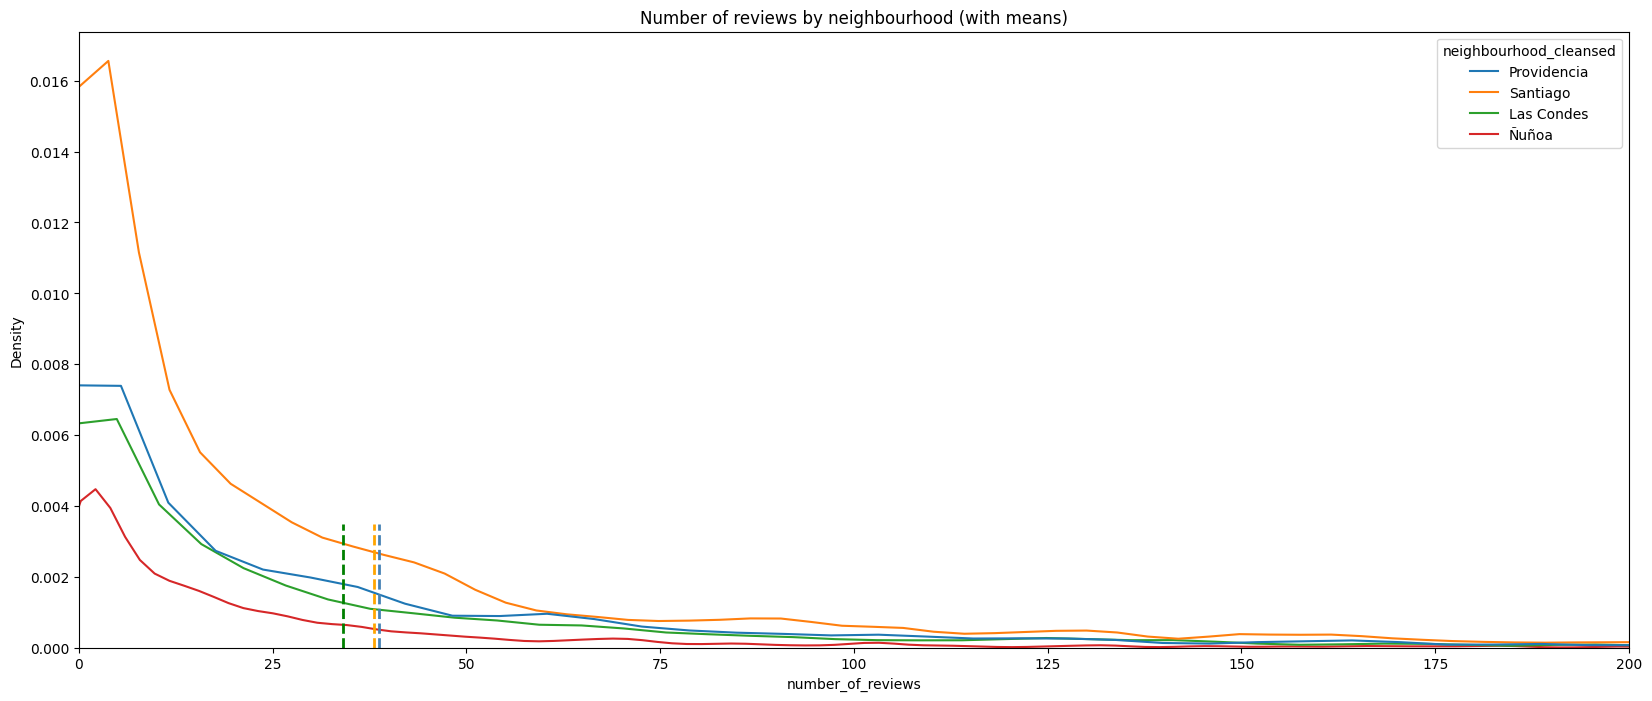

In [64]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_Santiago_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_Santiago_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Number of reviews by neighbourhood (with means)")
plt.xlim([0, 200])
plt.show()

<Figure size 1400x800 with 0 Axes>

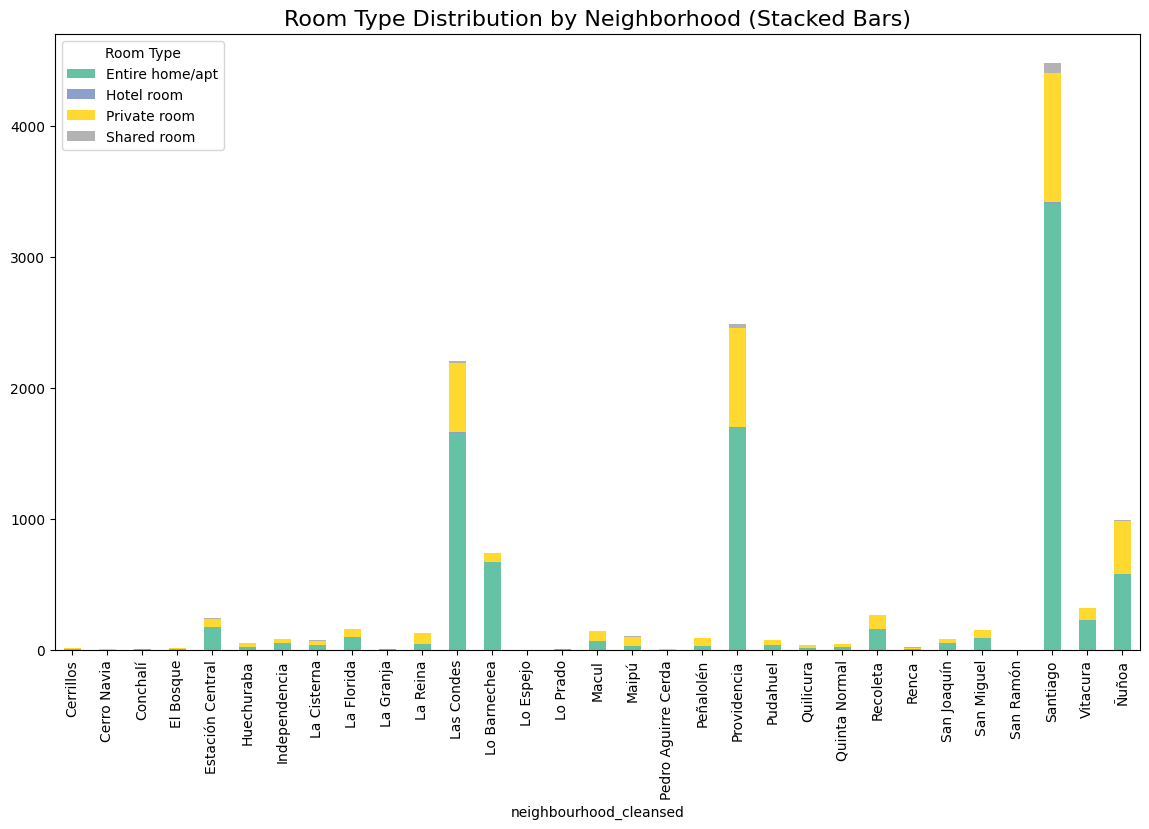

In [65]:
#Stacked bars between room_type and neighborhood
plt.figure(figsize=(14, 8))

listings_Santiago_df.groupby(['neighbourhood_cleansed', 'room_type']).size().unstack().plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
plt.title('Room Type Distribution by Neighborhood (Stacked Bars)', fontsize=16)
plt.xticks(rotation=90)
plt.legend(title='Room Type')
plt.show()

c:\Users\lperd\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


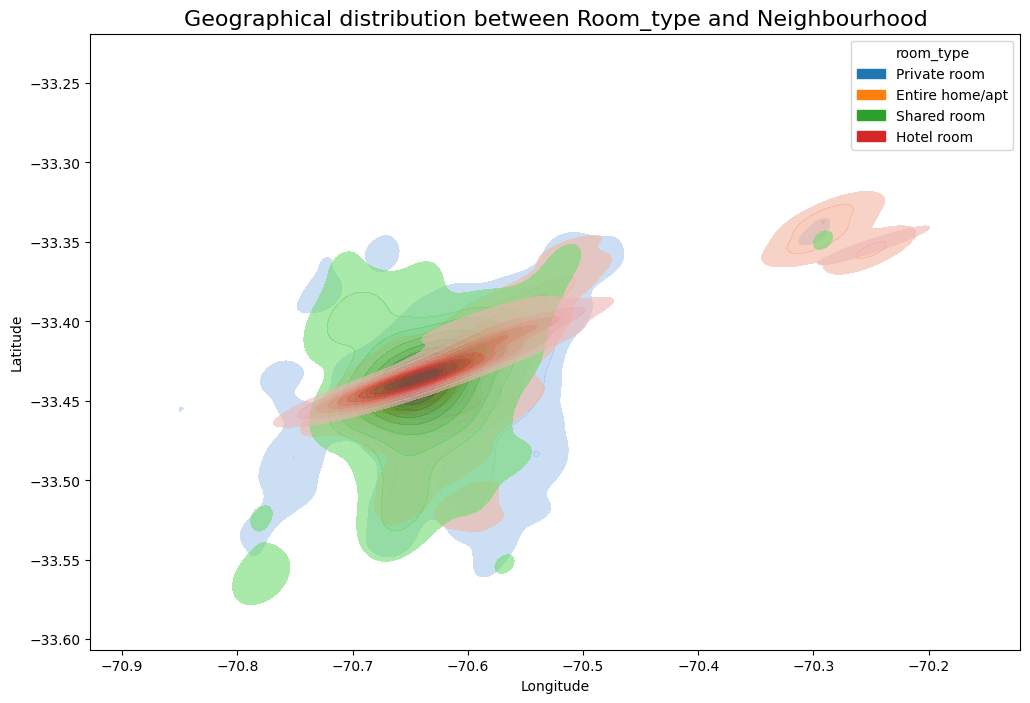

In [66]:
#Geographical distribution between room_type and neighbourhood
plt.figure(figsize=(12, 8))
sns.kdeplot(
    x=listings_Santiago_df['longitude'], 
    y=listings_Santiago_df['latitude'], 
    hue=listings_Santiago_df['room_type'], 
    fill=True, 
    cmap='viridis',
    alpha=0.6,
    common_norm=False
)

plt.title('Geographical distribution between Room_type and Neighbourhood', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

                        cluster
neighbourhood_cleansed         
Cerrillos                     2
Cerro Navia                   8
Conchalí                      2
El Bosque                     2
Estación Central              5


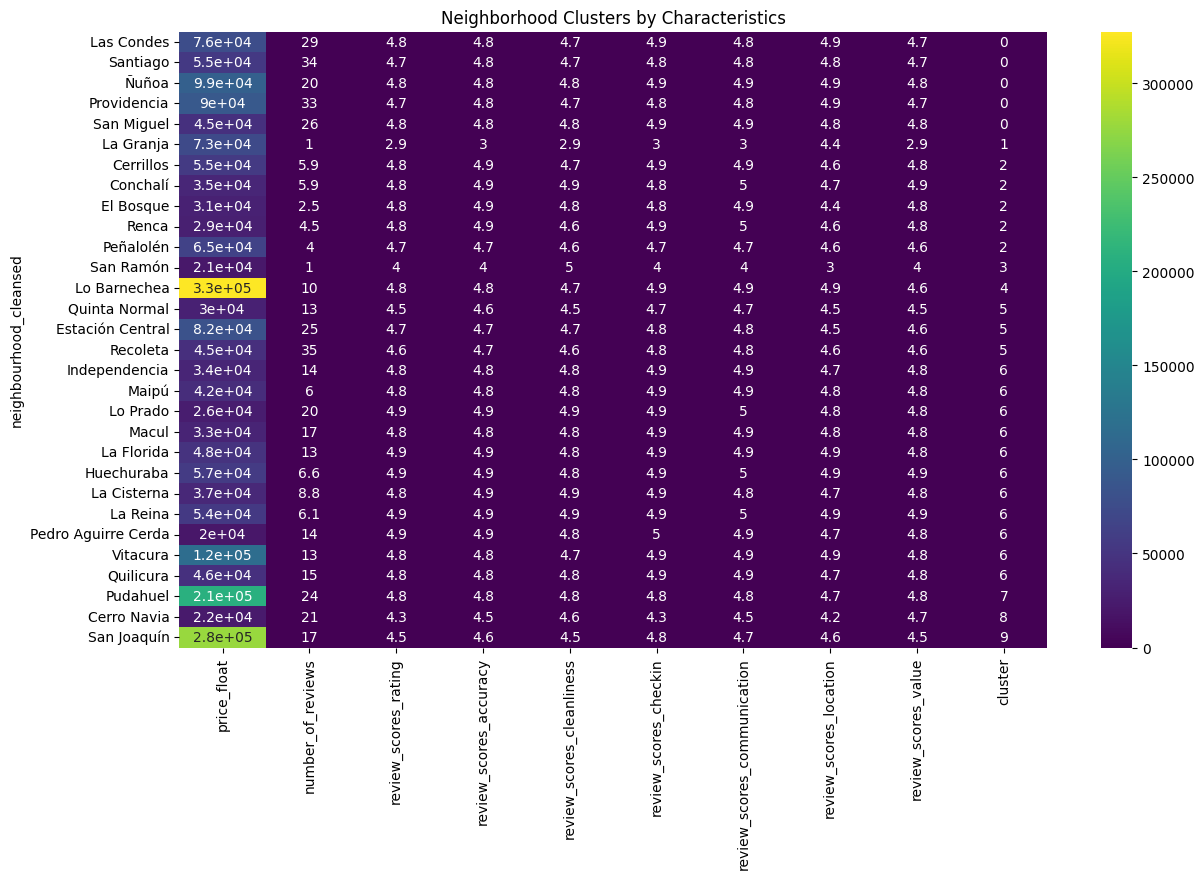

In [67]:
#Cluster of neighborhoods by similar characteristics

features_neighbourhood = [
    'price_float',
    'number_of_reviews',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

df_grouped_neighbourhood = listings_Santiago_df.groupby('neighbourhood_cleansed')[features_neighbourhood].mean().dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_grouped_neighbourhood)

k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
df_grouped_neighbourhood['cluster'] = kmeans.fit_predict(df_scaled)
print(df_grouped_neighbourhood[['cluster']].head())

plt.figure(figsize=(14, 8))
sns.heatmap(df_grouped_neighbourhood.sort_values('cluster'), cmap='viridis', annot=True)
plt.title('Neighborhood Clusters by Characteristics')
plt.show()

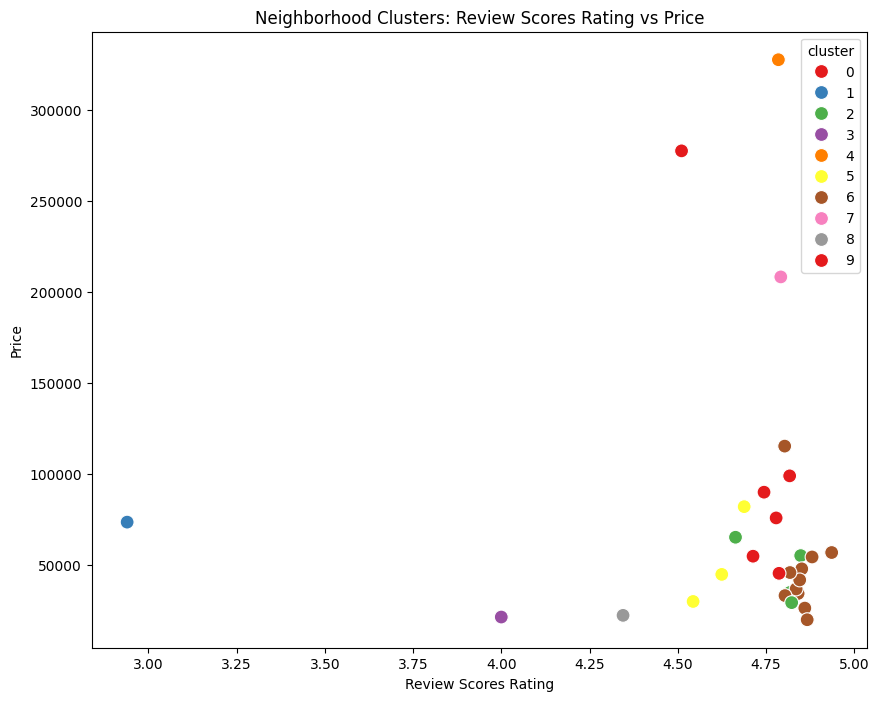

In [68]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_grouped_neighbourhood['review_scores_rating'], 
    y=df_grouped_neighbourhood['price_float'], 
    hue=df_grouped_neighbourhood['cluster'], 
    palette='Set1', 
    s=100
)
plt.title('Neighborhood Clusters: Review Scores Rating vs Price')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.show()

C:\Users\lperd\AppData\Local\Temp\ipykernel_28292\2300206326.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


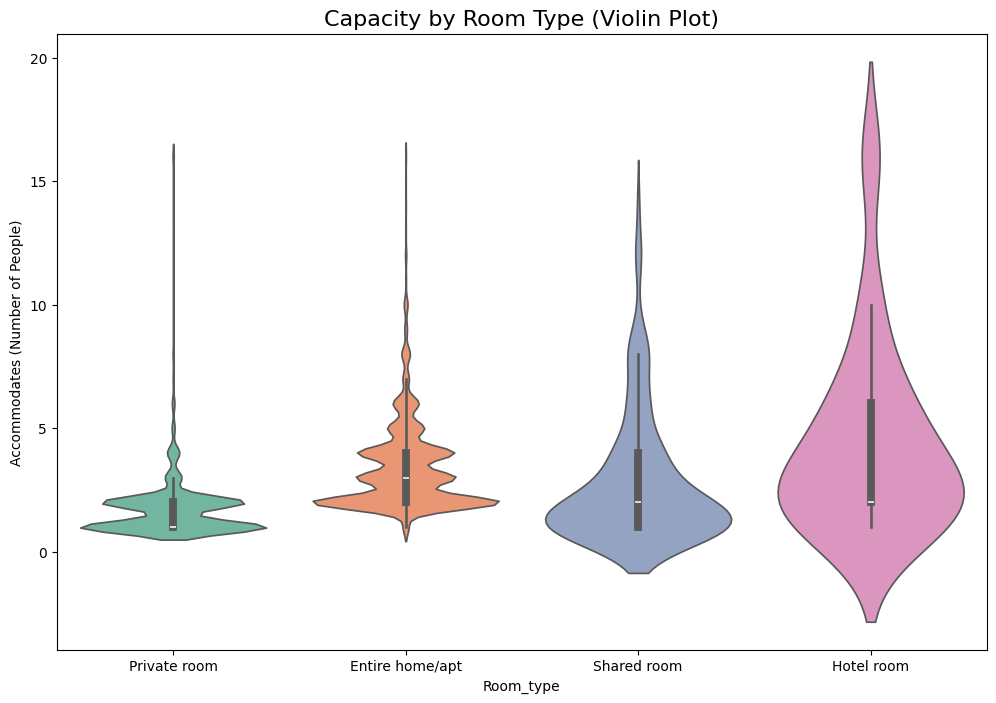

In [69]:
#Relationship between the capacity of each room type (accommodates) and room_type
plt.figure(figsize=(12, 8))

sns.violinplot(
    x='room_type', 
    y='accommodates', 
    data=listings_Santiago_df,
    palette='Set2',
    inner='box'  # Añadir una caja interna para mostrar la mediana y los cuartiles
)

plt.title('Capacity by Room Type (Violin Plot)', fontsize=16)
plt.xlabel('Room_type')
plt.ylabel('Accommodates (Number of People)')

plt.show()

C:\Users\lperd\AppData\Local\Temp\ipykernel_28292\2820027532.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


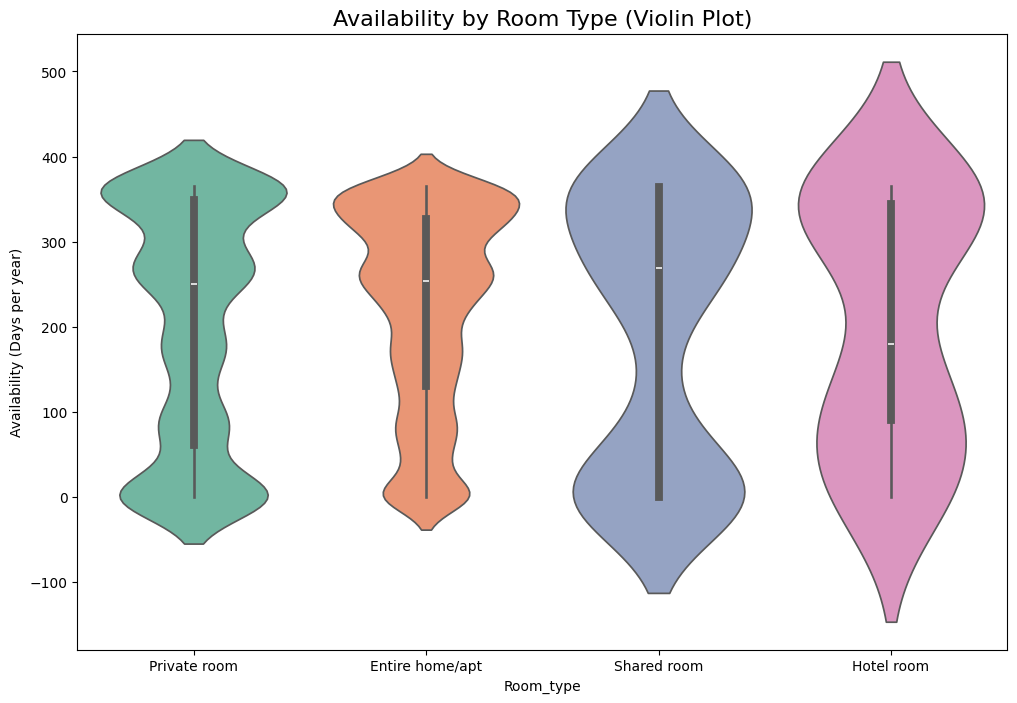

In [70]:
#Relationship between room_type and property availability (availability_365)
plt.figure(figsize=(12, 8))

sns.violinplot(
    x='room_type', 
    y='availability_365', 
    data=listings_Santiago_df,
    palette='Set2',
    inner='box'  # Añadir una caja interna para mostrar la mediana y los cuartiles
)

plt.title('Availability by Room Type (Violin Plot)', fontsize=16)
plt.xlabel('Room_type')
plt.ylabel('Availability (Days per year)')
plt.show()

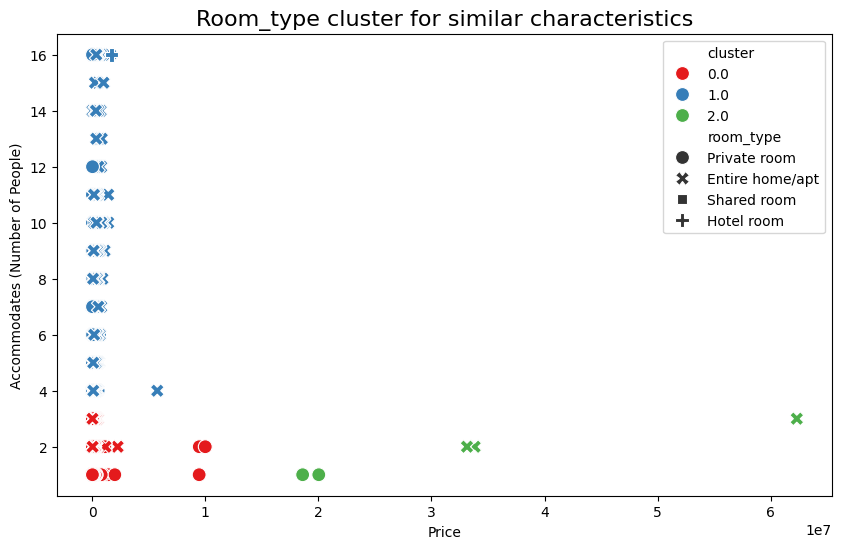

In [71]:
#Room_type cluster for similar characteristics
features_room_type = listings_Santiago_df[['price_float','accommodates', 'availability_365']].dropna()
scaler = StandardScaler()
features_scaled_room_type = scaler.fit_transform(features_room_type)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled_room_type)

listings_Santiago_df['cluster'] = pd.Series(clusters, index=features_room_type.index)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='price_float', 
    y='accommodates', 
    hue='cluster', 
    data=listings_Santiago_df, 
    palette='Set1', 
    style='room_type',
    s=100
)

plt.title('Room_type cluster for similar characteristics', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Accommodates (Number of People)')
plt.show()

C:\Users\lperd\AppData\Local\Temp\ipykernel_28292\1354443523.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


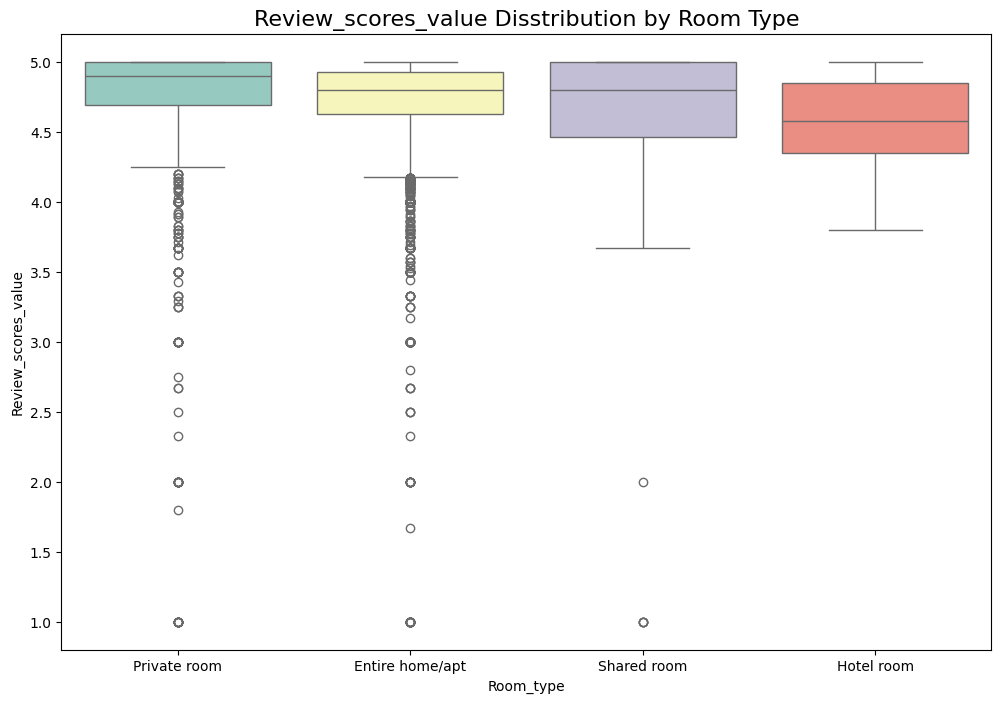

In [72]:
#boxplot to compare review_scores_value with room_type
plt.figure(figsize=(12, 8))

sns.boxplot(
    x='room_type', 
    y='review_scores_value', 
    data=listings_Santiago_df,
    palette='Set3'
)

plt.title('Review_scores_value Disstribution by Room Type', fontsize=16)
plt.xlabel('Room_type')
plt.ylabel('Review_scores_value')
plt.show()

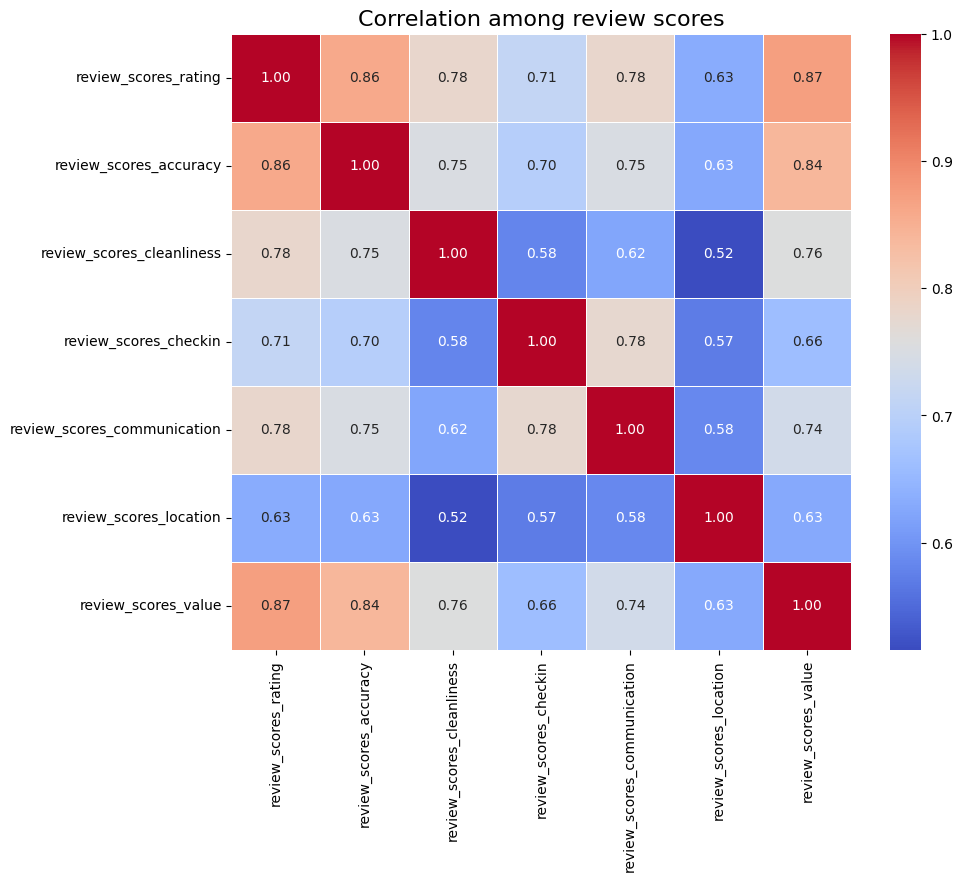

In [73]:
# Plotting correlation heatmap among review scores
review_columns = [
    'review_scores_rating', 
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

df_reviews = listings_Santiago_df[review_columns].dropna()
corr_matrix = df_reviews.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix, 
    annot=True, # Mostrar los valores de correlación en el mapa
    cmap="coolwarm", # Colormap para el heatmap
    fmt=".2f", # Formato de los valores de correlación
    linewidths=0.5 # Ancho de las líneas que separan las celdas
)

plt.title('Correlation among review scores', fontsize=16)
plt.show()

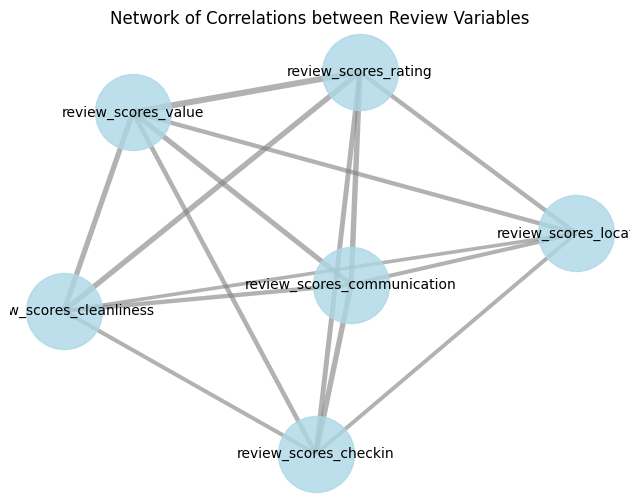

In [74]:
#Correlation Networks: The nodes represent the variables and the edges represent the correlations between them, helping to visualize the complex relationships between the review variables.
variables_review = ['review_scores_rating', 'review_scores_cleanliness', 
                    'review_scores_communication', 'review_scores_checkin',
                    'review_scores_location', 'review_scores_value']

df_reviews = listings_Santiago_df[variables_review].dropna()

corr_matrix_reviews = df_reviews.corr()
G = nx.Graph()
threshold = 0.3

for variable in variables_review:
    G.add_node(variable)
    
for i, var1 in enumerate(variables_review):
    for j, var2 in enumerate(variables_review):
        if i != j:
            corr_value = corr_matrix_reviews.loc[var1, var2]
            if abs(corr_value) >= threshold:
                G.add_edge(var1, var2, weight=corr_value)


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, k=1)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for (u, v, d) in edges], 
                       edge_color='gray', width=[d['weight']*5 for (u, v, d) in edges], alpha=0.6)


plt.title('Network of Correlations between Review Variables')
plt.axis('off')
plt.show()

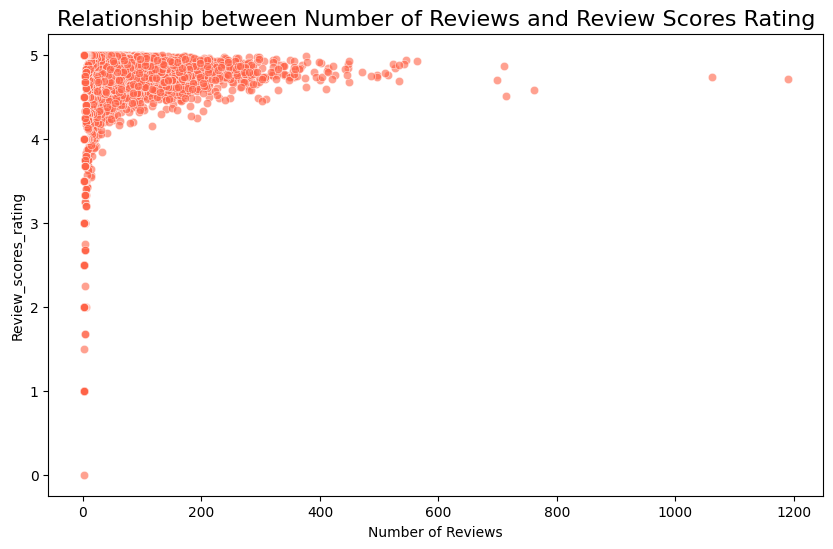

In [75]:
#scatter plot to compare numerical variables like number of reviews with review_scores_rating
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='number_of_reviews', 
    y='review_scores_rating', 
    data=listings_Santiago_df, 
    alpha=0.6, 
    color='tomato'
)

plt.title('Relationship between Number of Reviews and Review Scores Rating', fontsize=16)
plt.xlabel('Number of Reviews')
plt.ylabel('Review_scores_rating')
plt.show()

<Figure size 1400x1000 with 0 Axes>

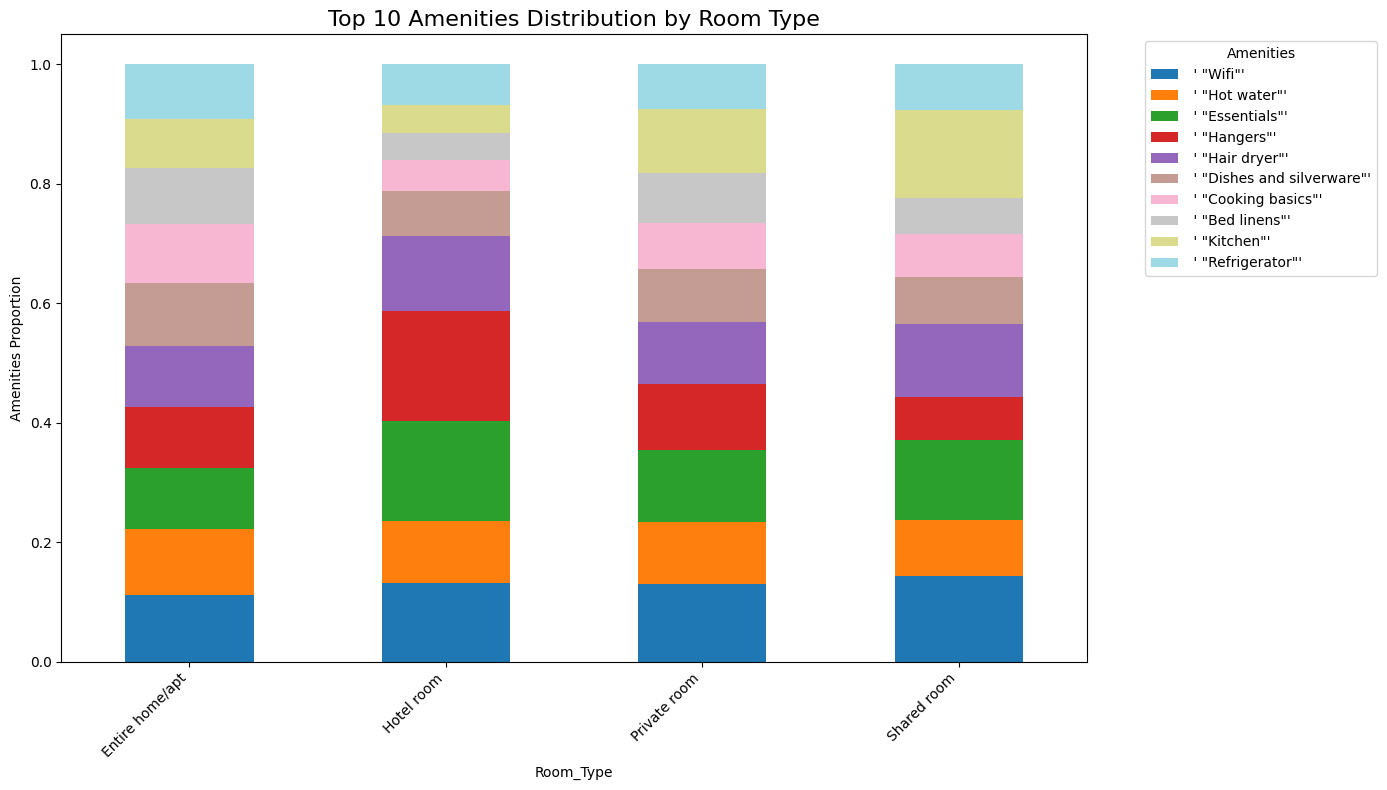

In [76]:
#Correlation between Amenities and Property Type with stacked bar chart
amenities_df = listings_Santiago_df['amenities'].str.get_dummies(sep=',').astype(int)
amenities_df['room_type'] = listings_Santiago_df['room_type']
amenities_by_property = amenities_df.groupby('room_type').sum()
top_amenities = amenities_by_property.sum().sort_values(ascending=False).head(10).index
filtered_amenities_by_property = amenities_by_property[top_amenities]
normalized_amenities_by_property = filtered_amenities_by_property.div(filtered_amenities_by_property.sum(axis=1), axis=0)

plt.figure(figsize=(14, 10))
normalized_amenities_by_property.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Top 10 Amenities Distribution by Room Type', fontsize=16)
plt.xlabel('Room_Type')
plt.ylabel('Amenities Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Amenities', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

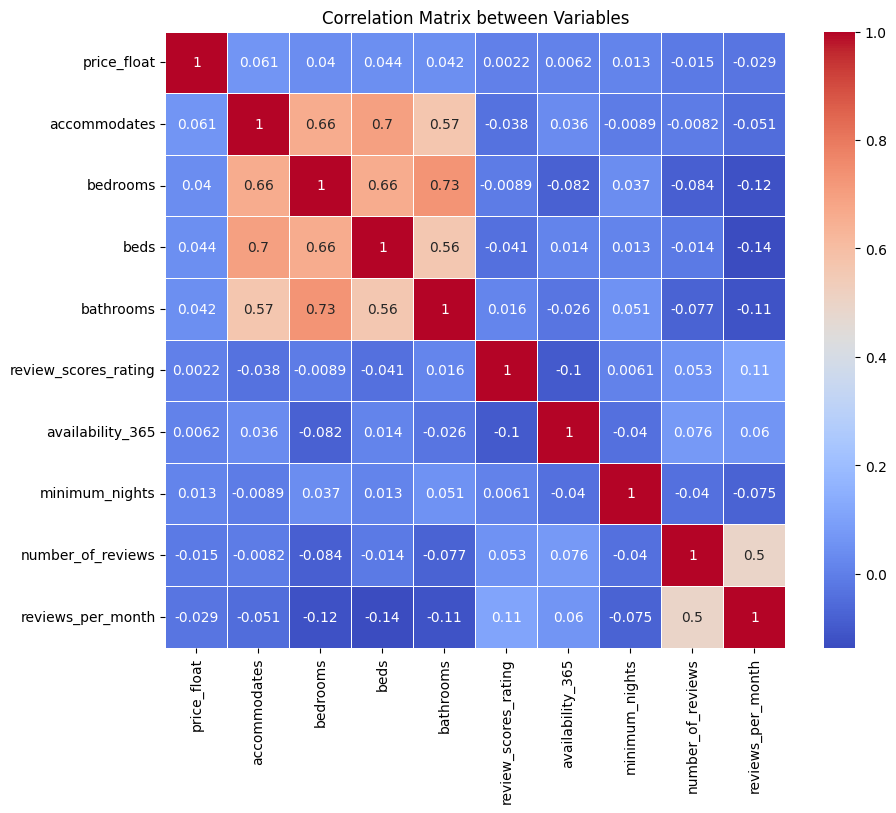

In [77]:
#Correlation matrix: Coded numerical and categorical variables.
variables_interest = ['price_float', 'accommodates', 'bedrooms', 'beds', 'bathrooms',
                     'review_scores_rating', 'availability_365', 'minimum_nights',
                     'number_of_reviews', 'reviews_per_month']

corr_matrix = listings_Santiago_df[variables_interest].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between Variables')
plt.show()

Predictive models for reviews based on price, room_type and neighborhood

In [78]:
data_model = listings_Santiago_df[['price_float', 'room_type', 'neighbourhood_cleansed', 'accommodates', 'bathrooms',
                  'bedrooms', 'beds', 'number_of_reviews', 'review_scores_value', 
                  'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                  'review_scores_location', 'review_scores_accuracy']].dropna()

label_encoders = {}
for column in ['room_type', 'neighbourhood_cleansed']:
    le = LabelEncoder()
    data_model[column] = le.fit_transform(data_model[column])
    label_encoders[column] = le
    
X = data_model.drop('review_scores_value', axis=1)
y = data_model['review_scores_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2}')
print(f'RMSE: {rmse}')

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))


R²: 0.7020051410315975
RMSE: 0.21412539621074092
       Actual  Predicted
2975     4.86     4.8803
9722     4.94     4.9126
5362     5.00     4.7567
6462     5.00     4.9967
11339    4.74     4.7819
2505     4.48     4.6236
2220     4.86     4.9095
2550     5.00     4.9307
8462     4.39     4.6126
3934     4.88     4.8377


PCA: Reduce the dimensionality of the set of amenities variables to identify the most influential combinations and then analyze how these main components relate to price and review_scores_rating.

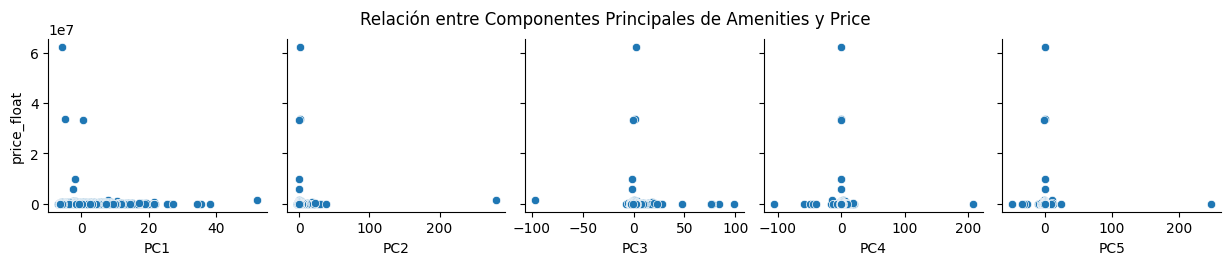

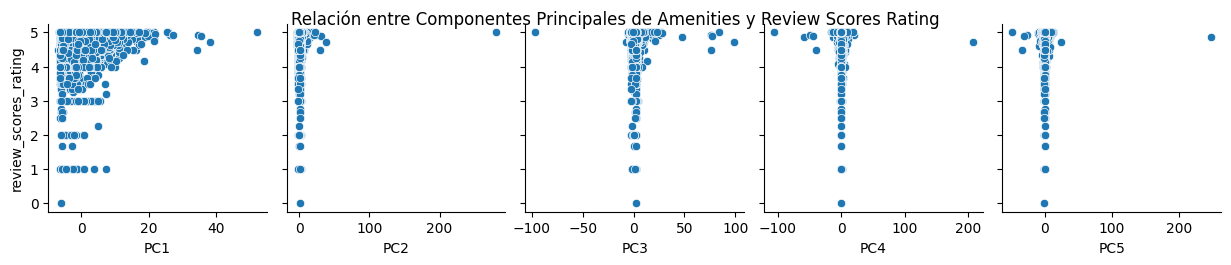

Varianza explicada por cada componente principal: [0.00659646 0.00371079 0.00305279 0.00277557 0.00271998]


In [79]:
data_pca = listings_Santiago_df[['price_float', 'review_scores_rating', 'amenities']].dropna()
amenities = data_pca['amenities'].str.get_dummies(sep=',')
scaler = StandardScaler()
amenities_scaled = scaler.fit_transform(amenities)

pca = PCA(n_components=5)  # Selecciona el número de componentes principales que deseas analizar
amenities_pca = pca.fit_transform(amenities_scaled)

amenities_pca_df = pd.DataFrame(amenities_pca, columns=[f'PC{i+1}' for i in range(5)])

amenities_pca_df['price_float'] = data_pca['price_float'].values
amenities_pca_df['review_scores_rating'] = data_pca['review_scores_rating'].values

sns.pairplot(amenities_pca_df, x_vars=[f'PC{i+1}' for i in range(5)], y_vars=['price_float'])
plt.suptitle('Relación entre Componentes Principales de Amenities y Price', y=1.02)
plt.show()

sns.pairplot(amenities_pca_df, x_vars=[f'PC{i+1}' for i in range(5)], y_vars=['review_scores_rating'])
plt.suptitle('Relación entre Componentes Principales de Amenities y Review Scores Rating', y=1.02)
plt.show()

explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", explained_variance)


Surface Charts: visualize how the variables availability_365, price, and minimum_nights are related. You can observe, for example, if there is a trend in which the most available properties have lower prices or if those that require more minimum nights have a different price.

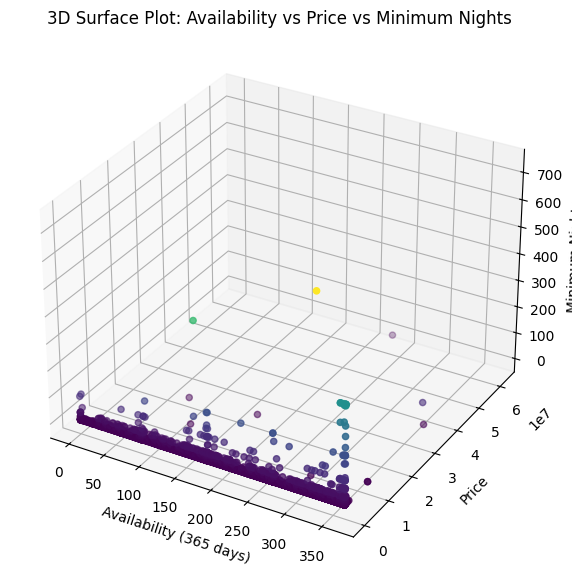

In [80]:
df_filtered = listings_Santiago_df[['availability_365', 'price_float', 'minimum_nights']].dropna()

X = df_filtered['availability_365']  
Y = df_filtered['price_float']     
Z = df_filtered['minimum_nights']           

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z, c=Z, cmap='viridis', marker='o')

ax.set_xlabel('Availability (365 days)')
ax.set_ylabel('Price')
ax.set_zlabel('Minimum Nights')
ax.set_title('3D Surface Plot: Availability vs Price vs Minimum Nights')

plt.show()
